In [1]:
import torch
import torch.nn as nn
from torch.autograd import Variable
import torchvision.datasets as dset
import torch.nn.functional as F
import torch.optim as optim
from torchvision import datasets, models, transforms
import os
import matplotlib.pyplot as plt 
import time

In [2]:
batch_size = 100
data_transforms = {
    'train': transforms.Compose([
        transforms.Resize(96),
        transforms.CenterCrop(128),
        transforms.Grayscale(),
        transforms.ToTensor(),
        transforms.Normalize([0.485, 0.456, 0.406], [0.229, 0.224, 0.225])
    ])}
data_dir = '/input'
image_datasets = {x: datasets.ImageFolder(os.path.join(data_dir, x),
                                          data_transforms[x])
                  for x in ['train']}
dataloaders = {x: torch.utils.data.DataLoader(image_datasets[x], batch_size=batch_size,
                                             shuffle=True,num_workers=4)
              for x in ['train']}

In [63]:
class ConvNet_L6(nn.Module):
    def __init__(self):
        super(ConvNet_L6, self).__init__()
        self.all_losses = []
        self.all_accuracy = []
        self.conv1 = nn.Conv2d(1, 32, 3, 1, 1) 
        self.conv2 = nn.Conv2d(32, 64, 3, 1, 1)
        self.conv3 = nn.Conv2d(64, 128, 3, 1, 1)
        self.fc1 = nn.Linear(16*16*128,1024)
        self.fc2 = nn.Linear(1024,512)
        self.fc3 = nn.Linear(512, 100)

    def forward(self, x):
        x = x.view(-1,1,128,128)
        x = F.max_pool2d(F.relu(self.conv1(x)), 2, 2)
        x = F.max_pool2d(F.relu(self.conv2(x)), 2, 2)
        x = F.max_pool2d(F.relu(self.conv3(x)), 2, 2)
        x = x.view(-1, 16*16*128)
        x = F.relu(self.fc1(x))
        x = F.relu(self.fc2(x))
        x = self.fc3(x)
        return F.log_softmax(x, dim = 1)

In [64]:
class ConvNet_L6_FC1(nn.Module):
    def __init__(self):
        super(ConvNet_L6_FC1, self).__init__()
        self.all_losses = []
        self.all_accuracy = []
        self.conv1 = nn.Conv2d(1, 32, 3, 1, 1) 
        self.conv2 = nn.Conv2d(32, 64, 3, 1, 1)
        self.conv3 = nn.Conv2d(64, 128, 3, 1, 1)
        self.fc1 = nn.Linear(16*16*128,4000)
        self.fc2 = nn.Linear(4000,1024)
        self.fc3 = nn.Linear(1024, 100)

    def forward(self, x):
        x = x.view(-1,1,128,128)
        x = F.max_pool2d(F.relu(self.conv1(x)), 2, 2)
        x = F.max_pool2d(F.relu(self.conv2(x)), 2, 2)
        x = F.max_pool2d(F.relu(self.conv3(x)), 2, 2)
        x = x.view(-1, 16*16*128)
        x = F.relu(self.fc1(x))
        x = F.relu(self.fc2(x))
        x = self.fc3(x)
        return F.log_softmax(x, dim = 1)

In [65]:
class ConvNet_L6_FC2(nn.Module):
    def __init__(self):
        super(ConvNet_L6_FC2, self).__init__()
        self.all_losses = []
        self.all_accuracy = []
        self.conv1 = nn.Conv2d(1, 32, 3, 1, 1) 
        self.conv2 = nn.Conv2d(32, 64, 3, 1, 1)
        self.conv3 = nn.Conv2d(64, 128, 3, 1, 1)
        self.fc1 = nn.Linear(16*16*128,1024)
        self.fc2 = nn.Linear(1024,1024)
        self.fc3 = nn.Linear(1024, 100)

    def forward(self, x):
        x = x.view(-1,1,128,128)
        x = F.max_pool2d(F.relu(self.conv1(x)), 2, 2)
        x = F.max_pool2d(F.relu(self.conv2(x)), 2, 2)
        x = F.max_pool2d(F.relu(self.conv3(x)), 2, 2)
        x = x.view(-1, 16*16*128)
        x = F.relu(self.fc1(x))
        x = F.relu(self.fc2(x))
        x = self.fc3(x)
        return F.log_softmax(x, dim = 1)

In [66]:
class ConvNet_L6_FC3(nn.Module):
    def __init__(self):
        super(ConvNet_L6_FC3, self).__init__()
        self.all_losses = []
        self.all_accuracy = []
        self.conv1 = nn.Conv2d(1, 32, 3, 1, 1) 
        self.conv2 = nn.Conv2d(32, 64, 3, 1, 1)
        self.conv3 = nn.Conv2d(64, 128, 3, 1, 1)
        self.fc1 = nn.Linear(16*16*128,4000)
        self.fc2 = nn.Linear(4000,1024)
        self.fc3 = nn.Linear(1024, 512)
        self.fc4 = nn.Linear(512, 100)

    def forward(self, x):
        x = x.view(-1,1,128,128)
        x = F.max_pool2d(F.relu(self.conv1(x)), 2, 2)
        x = F.max_pool2d(F.relu(self.conv2(x)), 2, 2)
        x = F.max_pool2d(F.relu(self.conv3(x)), 2, 2)
        x = x.view(-1, 16*16*128)
        x = F.relu(self.fc1(x))
        x = F.relu(self.fc2(x))
        x = F.relu(self.fc3(x))
        x = self.fc4(x)
        return F.log_softmax(x, dim = 1)

In [67]:
class ConvNet_L7(nn.Module):
    def __init__(self):
        super(ConvNet_L7, self).__init__()
        self.all_losses = []
        self.all_accuracy = []
        self.conv1 = nn.Conv2d(1, 32, 3, 1, 1) 
        self.conv2 = nn.Conv2d(32, 64, 3, 1, 1)
        self.conv3 = nn.Conv2d(64, 128, 3, 1, 1)
        self.conv4 = nn.Conv2d(128, 256, 3, 1, 1)
        self.fc1 = nn.Linear(8*8*256,1024)
        self.fc2 = nn.Linear(1024,512)
        self.fc3 = nn.Linear(512, 100)

    def forward(self, x):
        x = x.view(-1,1,128,128)
        x = F.max_pool2d(F.relu(self.conv1(x)), 2, 2)
        x = F.max_pool2d(F.relu(self.conv2(x)), 2, 2)
        x = F.max_pool2d(F.relu(self.conv3(x)), 2, 2)
        x = F.max_pool2d(F.relu(self.conv4(x)), 2, 2)
        x = x.view(-1, 8*8*256)
        x = F.relu(self.fc1(x))
        x = F.relu(self.fc2(x))
        x = self.fc3(x)
        return F.log_softmax(x, dim = 1)

In [68]:
class ConvNet_L8(nn.Module):
    def __init__(self):
        super(ConvNet_L8, self).__init__()
        self.all_losses = []
        self.all_accuracy = []
        self.conv1 = nn.Conv2d(1, 32, 3, 1, 1) 
        self.conv2 = nn.Conv2d(32, 64, 3, 1, 1)
        self.conv3 = nn.Conv2d(64, 128, 3, 1, 1)       
        self.conv4 = nn.Conv2d(128, 256, 3, 1, 1)
        self.conv5 = nn.Conv2d(256, 512, 3, 1, 1)
        self.fc1 = nn.Linear(4*4*512,1024)
        self.fc2 = nn.Linear(1024,512)
        self.fc3 = nn.Linear(512, 100)

    def forward(self, x):
        x = x.view(-1,1,128,128)
        x = F.max_pool2d(F.relu(self.conv1(x)), 2, 2)
        x = F.max_pool2d(F.relu(self.conv2(x)), 2, 2)
        x = F.max_pool2d(F.relu(self.conv3(x)), 2, 2)
        x = F.max_pool2d(F.relu(self.conv4(x)), 2, 2)
        x = F.max_pool2d(F.relu(self.conv5(x)), 2, 2)
        x = x.view(-1, 4*4*512)
        x = F.relu(self.fc1(x))
        x = F.relu(self.fc2(x))
        x = self.fc3(x)
        return F.log_softmax(x, dim = 1)

In [69]:
class Training():
    def __init__(self,dataloaders,ConvNet,lr = 0.1, epoch = 10):
        self.criteria = nn.CrossEntropyLoss()
        self.model = ConvNet
        self.optimizer = optim.SGD(ConvNet.parameters(), lr=lr, momentum=0.9)
        self.log_interval=10#log_interval * batch_size = the number of displayed samples
        self.epoch = epoch
        self.data = dataloaders
        self.ConvNet = ConvNet
        
    def start(self):
        for epoch in range(self.epoch):#set epoch of iteration
            for batch_idx, (data,target) in enumerate(self.data['train']):
                data, target = Variable(data.cuda()), Variable(target.cuda())#turn x,y from tensors to Variables
                y_pred = self.model(data)#feed x, return prediction on the sample
                prediction = torch.max(F.softmax(y_pred), 1)[1]
                pred_y = prediction.cpu().data.numpy().squeeze()
                target_y = target.cpu().data.numpy()
                loss = self.criteria(y_pred, target)#cal loss
                self.optimizer.zero_grad()#set all gradient to 0
                loss.backward()#begin backprop
                self.optimizer.step()#cal grad
                if batch_idx % self.log_interval == 0:#display progress
                    accuracy = sum(pred_y == target_y) / 100.0
                    self.ConvNet.all_losses.append(loss.data[0])
                    self.ConvNet.all_accuracy.append(accuracy)
                    print('Train Epoch: {} [{}/{} ({:.3f}%)]\tLoss: {:.6f}\tAccuracy: {:.3f}'.format(
                        epoch, batch_size*batch_idx, batch_size*len(self.data['train']),
                        100. * batch_idx / len(self.data['train']), loss.data[0], accuracy))

In [29]:
model_l6 = ConvNet_L6()
model_l6.cuda()
model_l6_fc_1 = ConvNet_L6_FC1()
model_l6_fc_1.cuda()
model_l6_fc_2 = ConvNet_L6_FC2()
model_l6_fc_2.cuda()
model_l6_fc_3 = ConvNet_L6_FC3()
model_l6_fc_3.cuda()
model_l7 = ConvNet_L7()
model_l7.cuda()
model_l8 = ConvNet_L8()
model_l8.cuda()

ConvNet_L8(
  (conv1): Conv2d (1, 32, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (conv2): Conv2d (32, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (conv3): Conv2d (64, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (conv4): Conv2d (128, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (conv5): Conv2d (256, 512, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (fc1): Linear(in_features=8192, out_features=1024)
  (fc2): Linear(in_features=1024, out_features=512)
  (fc3): Linear(in_features=512, out_features=100)
)

In [70]:
model_l6_b = ConvNet_L6()
model_l6_b.cuda()
model_l6_fc_1_b = ConvNet_L6_FC1()
model_l6_fc_1_b.cuda()
model_l6_fc_2_b = ConvNet_L6_FC2()
model_l6_fc_2_b.cuda()
model_l6_fc_3_b = ConvNet_L6_FC3()
model_l6_fc_3_b.cuda()
model_l7_b = ConvNet_L7()
model_l7_b.cuda()
model_l8_b = ConvNet_L8()
model_l8_b.cuda()

ConvNet_L8(
  (conv1): Conv2d (1, 32, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (conv2): Conv2d (32, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (conv3): Conv2d (64, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (conv4): Conv2d (128, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (conv5): Conv2d (256, 512, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (fc1): Linear(in_features=8192, out_features=1024)
  (fc2): Linear(in_features=1024, out_features=512)
  (fc3): Linear(in_features=512, out_features=100)
)

In [30]:
# train_05 = Training(dataloaders, model, 0.05)
# train_001 = Training(dataloaders, model, 0.001)

start_time = time.time()
train = Training(dataloaders, model_l6,0.05)
train.start()
print("--- %s seconds ---" % (time.time() - start_time))

/usr/local/miniconda3/envs/dl/lib/python3.5/site-packages/ipykernel_launcher.py:16: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  app.launch_new_instance()


Train Epoch: 0 [0/40000 (0.000%)]	Loss: 4.606849	Accuracy: 0.010
Train Epoch: 0 [1000/40000 (2.500%)]	Loss: 4.616742	Accuracy: 0.000
Train Epoch: 0 [2000/40000 (5.000%)]	Loss: 4.601748	Accuracy: 0.010
Train Epoch: 0 [3000/40000 (7.500%)]	Loss: 4.607521	Accuracy: 0.020
Train Epoch: 0 [4000/40000 (10.000%)]	Loss: 4.603885	Accuracy: 0.000
Train Epoch: 0 [5000/40000 (12.500%)]	Loss: 4.602262	Accuracy: 0.010
Train Epoch: 0 [6000/40000 (15.000%)]	Loss: 4.599072	Accuracy: 0.030
Train Epoch: 0 [7000/40000 (17.500%)]	Loss: 4.605798	Accuracy: 0.040
Train Epoch: 0 [8000/40000 (20.000%)]	Loss: 4.596768	Accuracy: 0.020
Train Epoch: 0 [9000/40000 (22.500%)]	Loss: 4.604231	Accuracy: 0.010
Train Epoch: 0 [10000/40000 (25.000%)]	Loss: 4.590689	Accuracy: 0.020
Train Epoch: 0 [11000/40000 (27.500%)]	Loss: 4.581794	Accuracy: 0.010
Train Epoch: 0 [12000/40000 (30.000%)]	Loss: 4.538524	Accuracy: 0.020
Train Epoch: 0 [13000/40000 (32.500%)]	Loss: 4.449623	Accuracy: 0.040
Train Epoch: 0 [14000/40000 (35.000%)

Train Epoch: 2 [38000/40000 (95.000%)]	Loss: 0.758256	Accuracy: 0.780
Train Epoch: 2 [39000/40000 (97.500%)]	Loss: 0.963162	Accuracy: 0.780
Train Epoch: 3 [0/40000 (0.000%)]	Loss: 0.446774	Accuracy: 0.890
Train Epoch: 3 [1000/40000 (2.500%)]	Loss: 0.341873	Accuracy: 0.900
Train Epoch: 3 [2000/40000 (5.000%)]	Loss: 0.419103	Accuracy: 0.880
Train Epoch: 3 [3000/40000 (7.500%)]	Loss: 0.330701	Accuracy: 0.910
Train Epoch: 3 [4000/40000 (10.000%)]	Loss: 0.390100	Accuracy: 0.840
Train Epoch: 3 [5000/40000 (12.500%)]	Loss: 0.462297	Accuracy: 0.880
Train Epoch: 3 [6000/40000 (15.000%)]	Loss: 0.466446	Accuracy: 0.840
Train Epoch: 3 [7000/40000 (17.500%)]	Loss: 0.681272	Accuracy: 0.790
Train Epoch: 3 [8000/40000 (20.000%)]	Loss: 0.508923	Accuracy: 0.870
Train Epoch: 3 [9000/40000 (22.500%)]	Loss: 0.444559	Accuracy: 0.870
Train Epoch: 3 [10000/40000 (25.000%)]	Loss: 0.544726	Accuracy: 0.860
Train Epoch: 3 [11000/40000 (27.500%)]	Loss: 0.286376	Accuracy: 0.900
Train Epoch: 3 [12000/40000 (30.000%)

Train Epoch: 5 [36000/40000 (90.000%)]	Loss: 0.350433	Accuracy: 0.910
Train Epoch: 5 [37000/40000 (92.500%)]	Loss: 0.416490	Accuracy: 0.870
Train Epoch: 5 [38000/40000 (95.000%)]	Loss: 0.321237	Accuracy: 0.930
Train Epoch: 5 [39000/40000 (97.500%)]	Loss: 0.417769	Accuracy: 0.870
Train Epoch: 6 [0/40000 (0.000%)]	Loss: 0.069544	Accuracy: 0.990
Train Epoch: 6 [1000/40000 (2.500%)]	Loss: 0.179194	Accuracy: 0.940
Train Epoch: 6 [2000/40000 (5.000%)]	Loss: 0.076727	Accuracy: 0.980
Train Epoch: 6 [3000/40000 (7.500%)]	Loss: 0.148470	Accuracy: 0.950
Train Epoch: 6 [4000/40000 (10.000%)]	Loss: 0.217366	Accuracy: 0.950
Train Epoch: 6 [5000/40000 (12.500%)]	Loss: 0.375433	Accuracy: 0.920
Train Epoch: 6 [6000/40000 (15.000%)]	Loss: 0.324879	Accuracy: 0.920
Train Epoch: 6 [7000/40000 (17.500%)]	Loss: 0.099537	Accuracy: 0.980
Train Epoch: 6 [8000/40000 (20.000%)]	Loss: 0.116834	Accuracy: 0.960
Train Epoch: 6 [9000/40000 (22.500%)]	Loss: 0.186409	Accuracy: 0.970
Train Epoch: 6 [10000/40000 (25.000%)

Train Epoch: 8 [34000/40000 (85.000%)]	Loss: 0.211246	Accuracy: 0.960
Train Epoch: 8 [35000/40000 (87.500%)]	Loss: 0.310202	Accuracy: 0.930
Train Epoch: 8 [36000/40000 (90.000%)]	Loss: 0.281907	Accuracy: 0.900
Train Epoch: 8 [37000/40000 (92.500%)]	Loss: 0.499513	Accuracy: 0.880
Train Epoch: 8 [38000/40000 (95.000%)]	Loss: 0.167603	Accuracy: 0.970
Train Epoch: 8 [39000/40000 (97.500%)]	Loss: 0.487890	Accuracy: 0.880
Train Epoch: 9 [0/40000 (0.000%)]	Loss: 0.505638	Accuracy: 0.890
Train Epoch: 9 [1000/40000 (2.500%)]	Loss: 0.309796	Accuracy: 0.930
Train Epoch: 9 [2000/40000 (5.000%)]	Loss: 0.261434	Accuracy: 0.920
Train Epoch: 9 [3000/40000 (7.500%)]	Loss: 0.199924	Accuracy: 0.970
Train Epoch: 9 [4000/40000 (10.000%)]	Loss: 0.191397	Accuracy: 0.950
Train Epoch: 9 [5000/40000 (12.500%)]	Loss: 0.112985	Accuracy: 0.960
Train Epoch: 9 [6000/40000 (15.000%)]	Loss: 0.093716	Accuracy: 0.980
Train Epoch: 9 [7000/40000 (17.500%)]	Loss: 0.341957	Accuracy: 0.920
Train Epoch: 9 [8000/40000 (20.000%

Text(0.5,1,'Loss')

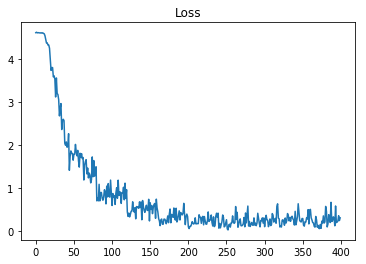

In [31]:
plt.figure()
plt.plot(model_l6.all_losses)
plt.title("Loss")

In [32]:
start_time = time.time()
train = Training(dataloaders, model_l7, 0.05)
train.start()
print("--- %s seconds ---" % (time.time() - start_time))

/usr/local/miniconda3/envs/dl/lib/python3.5/site-packages/ipykernel_launcher.py:16: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  app.launch_new_instance()


Train Epoch: 0 [0/40000 (0.000%)]	Loss: 4.603858	Accuracy: 0.020
Train Epoch: 0 [1000/40000 (2.500%)]	Loss: 4.606609	Accuracy: 0.010
Train Epoch: 0 [2000/40000 (5.000%)]	Loss: 4.597156	Accuracy: 0.050
Train Epoch: 0 [3000/40000 (7.500%)]	Loss: 4.613842	Accuracy: 0.000
Train Epoch: 0 [4000/40000 (10.000%)]	Loss: 4.601501	Accuracy: 0.000
Train Epoch: 0 [5000/40000 (12.500%)]	Loss: 4.611953	Accuracy: 0.010
Train Epoch: 0 [6000/40000 (15.000%)]	Loss: 4.598477	Accuracy: 0.060
Train Epoch: 0 [7000/40000 (17.500%)]	Loss: 4.604126	Accuracy: 0.000
Train Epoch: 0 [8000/40000 (20.000%)]	Loss: 4.601119	Accuracy: 0.000
Train Epoch: 0 [9000/40000 (22.500%)]	Loss: 4.600868	Accuracy: 0.010
Train Epoch: 0 [10000/40000 (25.000%)]	Loss: 4.608381	Accuracy: 0.000
Train Epoch: 0 [11000/40000 (27.500%)]	Loss: 4.603408	Accuracy: 0.020
Train Epoch: 0 [12000/40000 (30.000%)]	Loss: 4.596762	Accuracy: 0.010
Train Epoch: 0 [13000/40000 (32.500%)]	Loss: 4.588597	Accuracy: 0.030
Train Epoch: 0 [14000/40000 (35.000%)

Train Epoch: 2 [38000/40000 (95.000%)]	Loss: 0.883745	Accuracy: 0.720
Train Epoch: 2 [39000/40000 (97.500%)]	Loss: 0.953302	Accuracy: 0.760
Train Epoch: 3 [0/40000 (0.000%)]	Loss: 0.613882	Accuracy: 0.850
Train Epoch: 3 [1000/40000 (2.500%)]	Loss: 0.520150	Accuracy: 0.850
Train Epoch: 3 [2000/40000 (5.000%)]	Loss: 0.200261	Accuracy: 0.930
Train Epoch: 3 [3000/40000 (7.500%)]	Loss: 0.467669	Accuracy: 0.890
Train Epoch: 3 [4000/40000 (10.000%)]	Loss: 0.481137	Accuracy: 0.870
Train Epoch: 3 [5000/40000 (12.500%)]	Loss: 0.419736	Accuracy: 0.850
Train Epoch: 3 [6000/40000 (15.000%)]	Loss: 0.820657	Accuracy: 0.790
Train Epoch: 3 [7000/40000 (17.500%)]	Loss: 0.301892	Accuracy: 0.940
Train Epoch: 3 [8000/40000 (20.000%)]	Loss: 0.584745	Accuracy: 0.850
Train Epoch: 3 [9000/40000 (22.500%)]	Loss: 0.436518	Accuracy: 0.880
Train Epoch: 3 [10000/40000 (25.000%)]	Loss: 0.501753	Accuracy: 0.890
Train Epoch: 3 [11000/40000 (27.500%)]	Loss: 0.326071	Accuracy: 0.870
Train Epoch: 3 [12000/40000 (30.000%)

Train Epoch: 5 [36000/40000 (90.000%)]	Loss: 0.383078	Accuracy: 0.880
Train Epoch: 5 [37000/40000 (92.500%)]	Loss: 0.233479	Accuracy: 0.920
Train Epoch: 5 [38000/40000 (95.000%)]	Loss: 0.230296	Accuracy: 0.930
Train Epoch: 5 [39000/40000 (97.500%)]	Loss: 0.509346	Accuracy: 0.850
Train Epoch: 6 [0/40000 (0.000%)]	Loss: 0.185666	Accuracy: 0.940
Train Epoch: 6 [1000/40000 (2.500%)]	Loss: 0.326917	Accuracy: 0.900
Train Epoch: 6 [2000/40000 (5.000%)]	Loss: 0.151638	Accuracy: 0.930
Train Epoch: 6 [3000/40000 (7.500%)]	Loss: 0.130107	Accuracy: 0.950
Train Epoch: 6 [4000/40000 (10.000%)]	Loss: 0.152746	Accuracy: 0.930
Train Epoch: 6 [5000/40000 (12.500%)]	Loss: 0.185247	Accuracy: 0.950
Train Epoch: 6 [6000/40000 (15.000%)]	Loss: 0.382508	Accuracy: 0.900
Train Epoch: 6 [7000/40000 (17.500%)]	Loss: 0.346391	Accuracy: 0.910
Train Epoch: 6 [8000/40000 (20.000%)]	Loss: 0.258165	Accuracy: 0.920
Train Epoch: 6 [9000/40000 (22.500%)]	Loss: 0.159055	Accuracy: 0.960
Train Epoch: 6 [10000/40000 (25.000%)

Train Epoch: 8 [34000/40000 (85.000%)]	Loss: 0.270864	Accuracy: 0.940
Train Epoch: 8 [35000/40000 (87.500%)]	Loss: 0.075517	Accuracy: 0.970
Train Epoch: 8 [36000/40000 (90.000%)]	Loss: 0.302259	Accuracy: 0.940
Train Epoch: 8 [37000/40000 (92.500%)]	Loss: 0.181828	Accuracy: 0.940
Train Epoch: 8 [38000/40000 (95.000%)]	Loss: 0.250079	Accuracy: 0.920
Train Epoch: 8 [39000/40000 (97.500%)]	Loss: 0.092926	Accuracy: 0.970
Train Epoch: 9 [0/40000 (0.000%)]	Loss: 0.129901	Accuracy: 0.950
Train Epoch: 9 [1000/40000 (2.500%)]	Loss: 0.035980	Accuracy: 1.000
Train Epoch: 9 [2000/40000 (5.000%)]	Loss: 0.137841	Accuracy: 0.950
Train Epoch: 9 [3000/40000 (7.500%)]	Loss: 0.117878	Accuracy: 0.970
Train Epoch: 9 [4000/40000 (10.000%)]	Loss: 0.221302	Accuracy: 0.950
Train Epoch: 9 [5000/40000 (12.500%)]	Loss: 0.173660	Accuracy: 0.960
Train Epoch: 9 [6000/40000 (15.000%)]	Loss: 0.036645	Accuracy: 0.990
Train Epoch: 9 [7000/40000 (17.500%)]	Loss: 0.148229	Accuracy: 0.940
Train Epoch: 9 [8000/40000 (20.000%

Text(0.5,1,'Loss')

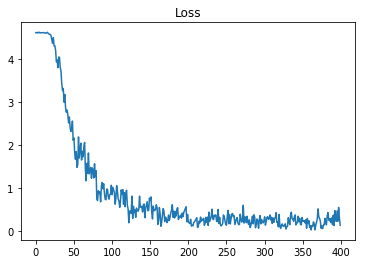

In [33]:
plt.figure()
plt.plot(model_l7.all_losses)
plt.title("Loss")

In [34]:
start_time = time.time()
train = Training(dataloaders, model_l8, 0.05)
train.start()
print("--- %s seconds ---" % (time.time() - start_time))

/usr/local/miniconda3/envs/dl/lib/python3.5/site-packages/ipykernel_launcher.py:16: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  app.launch_new_instance()


Train Epoch: 0 [0/40000 (0.000%)]	Loss: 4.600722	Accuracy: 0.030
Train Epoch: 0 [1000/40000 (2.500%)]	Loss: 4.601814	Accuracy: 0.000
Train Epoch: 0 [2000/40000 (5.000%)]	Loss: 4.612181	Accuracy: 0.010
Train Epoch: 0 [3000/40000 (7.500%)]	Loss: 4.600698	Accuracy: 0.020
Train Epoch: 0 [4000/40000 (10.000%)]	Loss: 4.600440	Accuracy: 0.010
Train Epoch: 0 [5000/40000 (12.500%)]	Loss: 4.614637	Accuracy: 0.000
Train Epoch: 0 [6000/40000 (15.000%)]	Loss: 4.603225	Accuracy: 0.020
Train Epoch: 0 [7000/40000 (17.500%)]	Loss: 4.602069	Accuracy: 0.010
Train Epoch: 0 [8000/40000 (20.000%)]	Loss: 4.611634	Accuracy: 0.000
Train Epoch: 0 [9000/40000 (22.500%)]	Loss: 4.607709	Accuracy: 0.010
Train Epoch: 0 [10000/40000 (25.000%)]	Loss: 4.607003	Accuracy: 0.000
Train Epoch: 0 [11000/40000 (27.500%)]	Loss: 4.606656	Accuracy: 0.010
Train Epoch: 0 [12000/40000 (30.000%)]	Loss: 4.606351	Accuracy: 0.010
Train Epoch: 0 [13000/40000 (32.500%)]	Loss: 4.612533	Accuracy: 0.000
Train Epoch: 0 [14000/40000 (35.000%)

Train Epoch: 2 [38000/40000 (95.000%)]	Loss: 0.773170	Accuracy: 0.790
Train Epoch: 2 [39000/40000 (97.500%)]	Loss: 1.008973	Accuracy: 0.730
Train Epoch: 3 [0/40000 (0.000%)]	Loss: 0.601007	Accuracy: 0.870
Train Epoch: 3 [1000/40000 (2.500%)]	Loss: 0.641120	Accuracy: 0.850
Train Epoch: 3 [2000/40000 (5.000%)]	Loss: 1.071155	Accuracy: 0.740
Train Epoch: 3 [3000/40000 (7.500%)]	Loss: 0.653480	Accuracy: 0.800
Train Epoch: 3 [4000/40000 (10.000%)]	Loss: 0.716435	Accuracy: 0.780
Train Epoch: 3 [5000/40000 (12.500%)]	Loss: 0.685072	Accuracy: 0.820
Train Epoch: 3 [6000/40000 (15.000%)]	Loss: 0.995534	Accuracy: 0.750
Train Epoch: 3 [7000/40000 (17.500%)]	Loss: 0.729648	Accuracy: 0.800
Train Epoch: 3 [8000/40000 (20.000%)]	Loss: 0.528888	Accuracy: 0.800
Train Epoch: 3 [9000/40000 (22.500%)]	Loss: 0.851855	Accuracy: 0.770
Train Epoch: 3 [10000/40000 (25.000%)]	Loss: 0.604239	Accuracy: 0.870
Train Epoch: 3 [11000/40000 (27.500%)]	Loss: 0.648473	Accuracy: 0.820
Train Epoch: 3 [12000/40000 (30.000%)

Train Epoch: 5 [36000/40000 (90.000%)]	Loss: 0.371236	Accuracy: 0.890
Train Epoch: 5 [37000/40000 (92.500%)]	Loss: 0.339832	Accuracy: 0.940
Train Epoch: 5 [38000/40000 (95.000%)]	Loss: 0.376064	Accuracy: 0.870
Train Epoch: 5 [39000/40000 (97.500%)]	Loss: 0.516828	Accuracy: 0.880
Train Epoch: 6 [0/40000 (0.000%)]	Loss: 0.381718	Accuracy: 0.920
Train Epoch: 6 [1000/40000 (2.500%)]	Loss: 0.316724	Accuracy: 0.920
Train Epoch: 6 [2000/40000 (5.000%)]	Loss: 0.199570	Accuracy: 0.930
Train Epoch: 6 [3000/40000 (7.500%)]	Loss: 0.211637	Accuracy: 0.940
Train Epoch: 6 [4000/40000 (10.000%)]	Loss: 0.181891	Accuracy: 0.930
Train Epoch: 6 [5000/40000 (12.500%)]	Loss: 0.261258	Accuracy: 0.890
Train Epoch: 6 [6000/40000 (15.000%)]	Loss: 0.221915	Accuracy: 0.910
Train Epoch: 6 [7000/40000 (17.500%)]	Loss: 0.261385	Accuracy: 0.930
Train Epoch: 6 [8000/40000 (20.000%)]	Loss: 0.355366	Accuracy: 0.900
Train Epoch: 6 [9000/40000 (22.500%)]	Loss: 0.153744	Accuracy: 0.970
Train Epoch: 6 [10000/40000 (25.000%)

Train Epoch: 8 [34000/40000 (85.000%)]	Loss: 0.126413	Accuracy: 0.950
Train Epoch: 8 [35000/40000 (87.500%)]	Loss: 0.213427	Accuracy: 0.930
Train Epoch: 8 [36000/40000 (90.000%)]	Loss: 0.394622	Accuracy: 0.880
Train Epoch: 8 [37000/40000 (92.500%)]	Loss: 0.367013	Accuracy: 0.890
Train Epoch: 8 [38000/40000 (95.000%)]	Loss: 0.252822	Accuracy: 0.940
Train Epoch: 8 [39000/40000 (97.500%)]	Loss: 0.409929	Accuracy: 0.900
Train Epoch: 9 [0/40000 (0.000%)]	Loss: 0.161774	Accuracy: 0.950
Train Epoch: 9 [1000/40000 (2.500%)]	Loss: 0.207896	Accuracy: 0.940
Train Epoch: 9 [2000/40000 (5.000%)]	Loss: 0.236657	Accuracy: 0.950
Train Epoch: 9 [3000/40000 (7.500%)]	Loss: 0.195118	Accuracy: 0.950
Train Epoch: 9 [4000/40000 (10.000%)]	Loss: 0.484999	Accuracy: 0.940
Train Epoch: 9 [5000/40000 (12.500%)]	Loss: 0.235824	Accuracy: 0.940
Train Epoch: 9 [6000/40000 (15.000%)]	Loss: 0.218414	Accuracy: 0.930
Train Epoch: 9 [7000/40000 (17.500%)]	Loss: 0.477073	Accuracy: 0.920
Train Epoch: 9 [8000/40000 (20.000%

Text(0.5,1,'Loss')

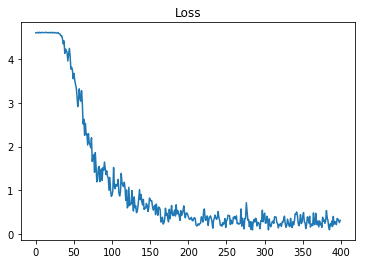

In [35]:
plt.figure()
plt.plot(model_l8.all_losses)
plt.title("Loss")

In [36]:
start_time = time.time()
train = Training(dataloaders, model_l6_fc_1, 0.05)
train.start()
print("--- %s seconds ---" % (time.time() - start_time))

/usr/local/miniconda3/envs/dl/lib/python3.5/site-packages/ipykernel_launcher.py:16: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  app.launch_new_instance()


Train Epoch: 0 [0/40000 (0.000%)]	Loss: 4.608204	Accuracy: 0.010
Train Epoch: 0 [1000/40000 (2.500%)]	Loss: 4.603706	Accuracy: 0.010
Train Epoch: 0 [2000/40000 (5.000%)]	Loss: 4.609830	Accuracy: 0.020
Train Epoch: 0 [3000/40000 (7.500%)]	Loss: 4.606497	Accuracy: 0.000
Train Epoch: 0 [4000/40000 (10.000%)]	Loss: 4.604549	Accuracy: 0.010
Train Epoch: 0 [5000/40000 (12.500%)]	Loss: 4.605877	Accuracy: 0.020
Train Epoch: 0 [6000/40000 (15.000%)]	Loss: 4.608692	Accuracy: 0.000
Train Epoch: 0 [7000/40000 (17.500%)]	Loss: 4.602146	Accuracy: 0.010
Train Epoch: 0 [8000/40000 (20.000%)]	Loss: 4.601903	Accuracy: 0.040
Train Epoch: 0 [9000/40000 (22.500%)]	Loss: 4.593112	Accuracy: 0.030
Train Epoch: 0 [10000/40000 (25.000%)]	Loss: 4.597013	Accuracy: 0.030
Train Epoch: 0 [11000/40000 (27.500%)]	Loss: 4.533136	Accuracy: 0.000
Train Epoch: 0 [12000/40000 (30.000%)]	Loss: 4.575871	Accuracy: 0.010
Train Epoch: 0 [13000/40000 (32.500%)]	Loss: 4.491817	Accuracy: 0.010
Train Epoch: 0 [14000/40000 (35.000%)

Train Epoch: 2 [38000/40000 (95.000%)]	Loss: 0.481655	Accuracy: 0.850
Train Epoch: 2 [39000/40000 (97.500%)]	Loss: 0.511455	Accuracy: 0.840
Train Epoch: 3 [0/40000 (0.000%)]	Loss: 0.154239	Accuracy: 0.950
Train Epoch: 3 [1000/40000 (2.500%)]	Loss: 0.115350	Accuracy: 0.960
Train Epoch: 3 [2000/40000 (5.000%)]	Loss: 0.374792	Accuracy: 0.930
Train Epoch: 3 [3000/40000 (7.500%)]	Loss: 0.242091	Accuracy: 0.940
Train Epoch: 3 [4000/40000 (10.000%)]	Loss: 0.273607	Accuracy: 0.930
Train Epoch: 3 [5000/40000 (12.500%)]	Loss: 0.198056	Accuracy: 0.930
Train Epoch: 3 [6000/40000 (15.000%)]	Loss: 0.236877	Accuracy: 0.940
Train Epoch: 3 [7000/40000 (17.500%)]	Loss: 0.141773	Accuracy: 0.930
Train Epoch: 3 [8000/40000 (20.000%)]	Loss: 0.285659	Accuracy: 0.910
Train Epoch: 3 [9000/40000 (22.500%)]	Loss: 0.235197	Accuracy: 0.940
Train Epoch: 3 [10000/40000 (25.000%)]	Loss: 0.138775	Accuracy: 0.990
Train Epoch: 3 [11000/40000 (27.500%)]	Loss: 0.359733	Accuracy: 0.910
Train Epoch: 3 [12000/40000 (30.000%)

Train Epoch: 5 [36000/40000 (90.000%)]	Loss: 0.146029	Accuracy: 0.950
Train Epoch: 5 [37000/40000 (92.500%)]	Loss: 0.209189	Accuracy: 0.940
Train Epoch: 5 [38000/40000 (95.000%)]	Loss: 0.116569	Accuracy: 0.950
Train Epoch: 5 [39000/40000 (97.500%)]	Loss: 0.099624	Accuracy: 0.960
Train Epoch: 6 [0/40000 (0.000%)]	Loss: 0.019517	Accuracy: 1.000
Train Epoch: 6 [1000/40000 (2.500%)]	Loss: 0.092113	Accuracy: 0.970
Train Epoch: 6 [2000/40000 (5.000%)]	Loss: 0.071433	Accuracy: 0.970
Train Epoch: 6 [3000/40000 (7.500%)]	Loss: 0.040832	Accuracy: 0.980
Train Epoch: 6 [4000/40000 (10.000%)]	Loss: 0.062250	Accuracy: 0.980
Train Epoch: 6 [5000/40000 (12.500%)]	Loss: 0.049715	Accuracy: 0.980
Train Epoch: 6 [6000/40000 (15.000%)]	Loss: 0.141982	Accuracy: 0.960
Train Epoch: 6 [7000/40000 (17.500%)]	Loss: 0.091888	Accuracy: 0.980
Train Epoch: 6 [8000/40000 (20.000%)]	Loss: 0.082138	Accuracy: 0.970
Train Epoch: 6 [9000/40000 (22.500%)]	Loss: 0.049642	Accuracy: 0.980
Train Epoch: 6 [10000/40000 (25.000%)

Train Epoch: 8 [34000/40000 (85.000%)]	Loss: 0.005070	Accuracy: 1.000
Train Epoch: 8 [35000/40000 (87.500%)]	Loss: 0.031367	Accuracy: 0.990
Train Epoch: 8 [36000/40000 (90.000%)]	Loss: 0.023578	Accuracy: 0.980
Train Epoch: 8 [37000/40000 (92.500%)]	Loss: 0.027842	Accuracy: 0.990
Train Epoch: 8 [38000/40000 (95.000%)]	Loss: 0.028910	Accuracy: 0.990
Train Epoch: 8 [39000/40000 (97.500%)]	Loss: 0.077565	Accuracy: 0.980
Train Epoch: 9 [0/40000 (0.000%)]	Loss: 0.025376	Accuracy: 0.990
Train Epoch: 9 [1000/40000 (2.500%)]	Loss: 0.036385	Accuracy: 0.990
Train Epoch: 9 [2000/40000 (5.000%)]	Loss: 0.075443	Accuracy: 0.980
Train Epoch: 9 [3000/40000 (7.500%)]	Loss: 0.116840	Accuracy: 0.970
Train Epoch: 9 [4000/40000 (10.000%)]	Loss: 0.005241	Accuracy: 1.000
Train Epoch: 9 [5000/40000 (12.500%)]	Loss: 0.161258	Accuracy: 0.970
Train Epoch: 9 [6000/40000 (15.000%)]	Loss: 0.027487	Accuracy: 0.990
Train Epoch: 9 [7000/40000 (17.500%)]	Loss: 0.072350	Accuracy: 0.960
Train Epoch: 9 [8000/40000 (20.000%

Text(0.5,1,'Loss')

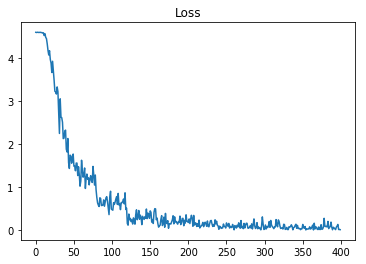

In [37]:
plt.figure()
plt.plot(model_l6_fc_1.all_losses)
plt.title("Loss")

In [38]:
start_time = time.time()
train = Training(dataloaders, model_l6_fc_2, 0.05)
train.start()
print("--- %s seconds ---" % (time.time() - start_time))

/usr/local/miniconda3/envs/dl/lib/python3.5/site-packages/ipykernel_launcher.py:16: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  app.launch_new_instance()


Train Epoch: 0 [0/40000 (0.000%)]	Loss: 4.603904	Accuracy: 0.010
Train Epoch: 0 [1000/40000 (2.500%)]	Loss: 4.609774	Accuracy: 0.020
Train Epoch: 0 [2000/40000 (5.000%)]	Loss: 4.615125	Accuracy: 0.010
Train Epoch: 0 [3000/40000 (7.500%)]	Loss: 4.602552	Accuracy: 0.010
Train Epoch: 0 [4000/40000 (10.000%)]	Loss: 4.604558	Accuracy: 0.000
Train Epoch: 0 [5000/40000 (12.500%)]	Loss: 4.606902	Accuracy: 0.010
Train Epoch: 0 [6000/40000 (15.000%)]	Loss: 4.602154	Accuracy: 0.010
Train Epoch: 0 [7000/40000 (17.500%)]	Loss: 4.602833	Accuracy: 0.030
Train Epoch: 0 [8000/40000 (20.000%)]	Loss: 4.610606	Accuracy: 0.020
Train Epoch: 0 [9000/40000 (22.500%)]	Loss: 4.592447	Accuracy: 0.020
Train Epoch: 0 [10000/40000 (25.000%)]	Loss: 4.573870	Accuracy: 0.030
Train Epoch: 0 [11000/40000 (27.500%)]	Loss: 4.577226	Accuracy: 0.040
Train Epoch: 0 [12000/40000 (30.000%)]	Loss: 4.497781	Accuracy: 0.030
Train Epoch: 0 [13000/40000 (32.500%)]	Loss: 4.544728	Accuracy: 0.010
Train Epoch: 0 [14000/40000 (35.000%)

Train Epoch: 2 [38000/40000 (95.000%)]	Loss: 1.075231	Accuracy: 0.700
Train Epoch: 2 [39000/40000 (97.500%)]	Loss: 0.734365	Accuracy: 0.760
Train Epoch: 3 [0/40000 (0.000%)]	Loss: 0.557816	Accuracy: 0.870
Train Epoch: 3 [1000/40000 (2.500%)]	Loss: 0.315783	Accuracy: 0.900
Train Epoch: 3 [2000/40000 (5.000%)]	Loss: 0.410108	Accuracy: 0.880
Train Epoch: 3 [3000/40000 (7.500%)]	Loss: 0.356590	Accuracy: 0.890
Train Epoch: 3 [4000/40000 (10.000%)]	Loss: 0.373615	Accuracy: 0.890
Train Epoch: 3 [5000/40000 (12.500%)]	Loss: 0.404546	Accuracy: 0.870
Train Epoch: 3 [6000/40000 (15.000%)]	Loss: 0.359190	Accuracy: 0.880
Train Epoch: 3 [7000/40000 (17.500%)]	Loss: 0.313651	Accuracy: 0.890
Train Epoch: 3 [8000/40000 (20.000%)]	Loss: 0.215014	Accuracy: 0.900
Train Epoch: 3 [9000/40000 (22.500%)]	Loss: 0.548178	Accuracy: 0.850
Train Epoch: 3 [10000/40000 (25.000%)]	Loss: 0.348863	Accuracy: 0.890
Train Epoch: 3 [11000/40000 (27.500%)]	Loss: 0.645353	Accuracy: 0.820
Train Epoch: 3 [12000/40000 (30.000%)

Train Epoch: 5 [36000/40000 (90.000%)]	Loss: 0.395248	Accuracy: 0.890
Train Epoch: 5 [37000/40000 (92.500%)]	Loss: 0.341345	Accuracy: 0.920
Train Epoch: 5 [38000/40000 (95.000%)]	Loss: 0.492572	Accuracy: 0.860
Train Epoch: 5 [39000/40000 (97.500%)]	Loss: 0.240783	Accuracy: 0.930
Train Epoch: 6 [0/40000 (0.000%)]	Loss: 0.142876	Accuracy: 0.960
Train Epoch: 6 [1000/40000 (2.500%)]	Loss: 0.130593	Accuracy: 0.930
Train Epoch: 6 [2000/40000 (5.000%)]	Loss: 0.097660	Accuracy: 0.950
Train Epoch: 6 [3000/40000 (7.500%)]	Loss: 0.235175	Accuracy: 0.910
Train Epoch: 6 [4000/40000 (10.000%)]	Loss: 0.162457	Accuracy: 0.950
Train Epoch: 6 [5000/40000 (12.500%)]	Loss: 0.159389	Accuracy: 0.980
Train Epoch: 6 [6000/40000 (15.000%)]	Loss: 0.139162	Accuracy: 0.950
Train Epoch: 6 [7000/40000 (17.500%)]	Loss: 0.139069	Accuracy: 0.950
Train Epoch: 6 [8000/40000 (20.000%)]	Loss: 0.051179	Accuracy: 0.980
Train Epoch: 6 [9000/40000 (22.500%)]	Loss: 0.169854	Accuracy: 0.950
Train Epoch: 6 [10000/40000 (25.000%)

Train Epoch: 8 [34000/40000 (85.000%)]	Loss: 0.099416	Accuracy: 0.970
Train Epoch: 8 [35000/40000 (87.500%)]	Loss: 0.108200	Accuracy: 0.970
Train Epoch: 8 [36000/40000 (90.000%)]	Loss: 0.203005	Accuracy: 0.930
Train Epoch: 8 [37000/40000 (92.500%)]	Loss: 0.366911	Accuracy: 0.930
Train Epoch: 8 [38000/40000 (95.000%)]	Loss: 0.300992	Accuracy: 0.930
Train Epoch: 8 [39000/40000 (97.500%)]	Loss: 0.055719	Accuracy: 0.990
Train Epoch: 9 [0/40000 (0.000%)]	Loss: 0.057305	Accuracy: 0.990
Train Epoch: 9 [1000/40000 (2.500%)]	Loss: 0.059579	Accuracy: 0.980
Train Epoch: 9 [2000/40000 (5.000%)]	Loss: 0.200732	Accuracy: 0.940
Train Epoch: 9 [3000/40000 (7.500%)]	Loss: 0.102789	Accuracy: 0.960
Train Epoch: 9 [4000/40000 (10.000%)]	Loss: 0.110935	Accuracy: 0.970
Train Epoch: 9 [5000/40000 (12.500%)]	Loss: 0.176180	Accuracy: 0.970
Train Epoch: 9 [6000/40000 (15.000%)]	Loss: 0.045708	Accuracy: 0.980
Train Epoch: 9 [7000/40000 (17.500%)]	Loss: 0.151207	Accuracy: 0.990
Train Epoch: 9 [8000/40000 (20.000%

Text(0.5,1,'Loss')

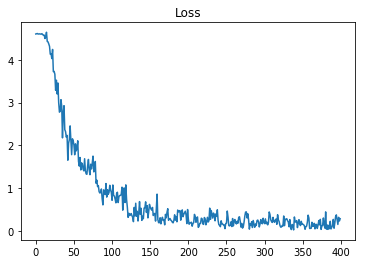

In [39]:
plt.figure()
plt.plot(model_l6_fc_2.all_losses)
plt.title("Loss")

In [40]:
start_time = time.time()
train = Training(dataloaders, model_l6_fc_3, 0.05)
train.start()
print("--- %s seconds ---" % (time.time() - start_time))

/usr/local/miniconda3/envs/dl/lib/python3.5/site-packages/ipykernel_launcher.py:16: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  app.launch_new_instance()


Train Epoch: 0 [0/40000 (0.000%)]	Loss: 4.609209	Accuracy: 0.010
Train Epoch: 0 [1000/40000 (2.500%)]	Loss: 4.608621	Accuracy: 0.000
Train Epoch: 0 [2000/40000 (5.000%)]	Loss: 4.617916	Accuracy: 0.010
Train Epoch: 0 [3000/40000 (7.500%)]	Loss: 4.618858	Accuracy: 0.030
Train Epoch: 0 [4000/40000 (10.000%)]	Loss: 4.601056	Accuracy: 0.020
Train Epoch: 0 [5000/40000 (12.500%)]	Loss: 4.608946	Accuracy: 0.000
Train Epoch: 0 [6000/40000 (15.000%)]	Loss: 4.601122	Accuracy: 0.000
Train Epoch: 0 [7000/40000 (17.500%)]	Loss: 4.610956	Accuracy: 0.010
Train Epoch: 0 [8000/40000 (20.000%)]	Loss: 4.611572	Accuracy: 0.000
Train Epoch: 0 [9000/40000 (22.500%)]	Loss: 4.602138	Accuracy: 0.020
Train Epoch: 0 [10000/40000 (25.000%)]	Loss: 4.610680	Accuracy: 0.010
Train Epoch: 0 [11000/40000 (27.500%)]	Loss: 4.599357	Accuracy: 0.010
Train Epoch: 0 [12000/40000 (30.000%)]	Loss: 4.598332	Accuracy: 0.020
Train Epoch: 0 [13000/40000 (32.500%)]	Loss: 4.581995	Accuracy: 0.010
Train Epoch: 0 [14000/40000 (35.000%)

Train Epoch: 2 [38000/40000 (95.000%)]	Loss: 0.874640	Accuracy: 0.820
Train Epoch: 2 [39000/40000 (97.500%)]	Loss: 0.823253	Accuracy: 0.740
Train Epoch: 3 [0/40000 (0.000%)]	Loss: 0.370009	Accuracy: 0.900
Train Epoch: 3 [1000/40000 (2.500%)]	Loss: 0.595790	Accuracy: 0.830
Train Epoch: 3 [2000/40000 (5.000%)]	Loss: 0.651334	Accuracy: 0.830
Train Epoch: 3 [3000/40000 (7.500%)]	Loss: 0.509366	Accuracy: 0.820
Train Epoch: 3 [4000/40000 (10.000%)]	Loss: 0.541189	Accuracy: 0.800
Train Epoch: 3 [5000/40000 (12.500%)]	Loss: 0.709740	Accuracy: 0.800
Train Epoch: 3 [6000/40000 (15.000%)]	Loss: 0.452784	Accuracy: 0.850
Train Epoch: 3 [7000/40000 (17.500%)]	Loss: 0.387102	Accuracy: 0.900
Train Epoch: 3 [8000/40000 (20.000%)]	Loss: 0.602706	Accuracy: 0.880
Train Epoch: 3 [9000/40000 (22.500%)]	Loss: 0.219406	Accuracy: 0.950
Train Epoch: 3 [10000/40000 (25.000%)]	Loss: 0.635809	Accuracy: 0.790
Train Epoch: 3 [11000/40000 (27.500%)]	Loss: 0.533172	Accuracy: 0.860
Train Epoch: 3 [12000/40000 (30.000%)

Train Epoch: 5 [36000/40000 (90.000%)]	Loss: 0.283227	Accuracy: 0.920
Train Epoch: 5 [37000/40000 (92.500%)]	Loss: 0.188951	Accuracy: 0.940
Train Epoch: 5 [38000/40000 (95.000%)]	Loss: 0.494365	Accuracy: 0.880
Train Epoch: 5 [39000/40000 (97.500%)]	Loss: 0.148817	Accuracy: 0.940
Train Epoch: 6 [0/40000 (0.000%)]	Loss: 0.184875	Accuracy: 0.940
Train Epoch: 6 [1000/40000 (2.500%)]	Loss: 0.162022	Accuracy: 0.950
Train Epoch: 6 [2000/40000 (5.000%)]	Loss: 0.137927	Accuracy: 0.950
Train Epoch: 6 [3000/40000 (7.500%)]	Loss: 0.117036	Accuracy: 0.970
Train Epoch: 6 [4000/40000 (10.000%)]	Loss: 0.114180	Accuracy: 0.940
Train Epoch: 6 [5000/40000 (12.500%)]	Loss: 0.182963	Accuracy: 0.940
Train Epoch: 6 [6000/40000 (15.000%)]	Loss: 0.192922	Accuracy: 0.950
Train Epoch: 6 [7000/40000 (17.500%)]	Loss: 0.119749	Accuracy: 0.940
Train Epoch: 6 [8000/40000 (20.000%)]	Loss: 0.286207	Accuracy: 0.930
Train Epoch: 6 [9000/40000 (22.500%)]	Loss: 0.186725	Accuracy: 0.970
Train Epoch: 6 [10000/40000 (25.000%)

Train Epoch: 8 [34000/40000 (85.000%)]	Loss: 0.073548	Accuracy: 0.980
Train Epoch: 8 [35000/40000 (87.500%)]	Loss: 0.091971	Accuracy: 0.970
Train Epoch: 8 [36000/40000 (90.000%)]	Loss: 0.052016	Accuracy: 0.980
Train Epoch: 8 [37000/40000 (92.500%)]	Loss: 0.041510	Accuracy: 0.980
Train Epoch: 8 [38000/40000 (95.000%)]	Loss: 0.101449	Accuracy: 0.980
Train Epoch: 8 [39000/40000 (97.500%)]	Loss: 0.216658	Accuracy: 0.960
Train Epoch: 9 [0/40000 (0.000%)]	Loss: 0.057044	Accuracy: 0.970
Train Epoch: 9 [1000/40000 (2.500%)]	Loss: 0.121772	Accuracy: 0.990
Train Epoch: 9 [2000/40000 (5.000%)]	Loss: 0.057036	Accuracy: 0.990
Train Epoch: 9 [3000/40000 (7.500%)]	Loss: 0.089326	Accuracy: 0.960
Train Epoch: 9 [4000/40000 (10.000%)]	Loss: 0.049189	Accuracy: 0.980
Train Epoch: 9 [5000/40000 (12.500%)]	Loss: 0.146747	Accuracy: 0.970
Train Epoch: 9 [6000/40000 (15.000%)]	Loss: 0.091602	Accuracy: 0.970
Train Epoch: 9 [7000/40000 (17.500%)]	Loss: 0.040554	Accuracy: 0.990
Train Epoch: 9 [8000/40000 (20.000%

Text(0.5,1,'Loss')

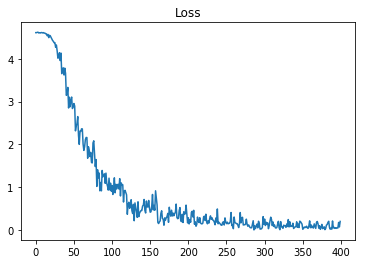

In [41]:
plt.figure()
plt.plot(model_l6_fc_3.all_losses)
plt.title("Loss")

In [71]:
start_time = time.time()
train = Training(dataloaders, model_l6_b,0.01)
train.start()
print("--- %s seconds ---" % (time.time() - start_time))

/usr/local/miniconda3/envs/dl/lib/python3.5/site-packages/ipykernel_launcher.py:16: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  app.launch_new_instance()


Train Epoch: 0 [0/40000 (0.000%)]	Loss: 4.606813	Accuracy: 0.000
Train Epoch: 0 [1000/40000 (2.500%)]	Loss: 4.602591	Accuracy: 0.010
Train Epoch: 0 [2000/40000 (5.000%)]	Loss: 4.609056	Accuracy: 0.010
Train Epoch: 0 [3000/40000 (7.500%)]	Loss: 4.615942	Accuracy: 0.000
Train Epoch: 0 [4000/40000 (10.000%)]	Loss: 4.613131	Accuracy: 0.010
Train Epoch: 0 [5000/40000 (12.500%)]	Loss: 4.604012	Accuracy: 0.010
Train Epoch: 0 [6000/40000 (15.000%)]	Loss: 4.606150	Accuracy: 0.010
Train Epoch: 0 [7000/40000 (17.500%)]	Loss: 4.607471	Accuracy: 0.030
Train Epoch: 0 [8000/40000 (20.000%)]	Loss: 4.605772	Accuracy: 0.030
Train Epoch: 0 [9000/40000 (22.500%)]	Loss: 4.609201	Accuracy: 0.000
Train Epoch: 0 [10000/40000 (25.000%)]	Loss: 4.595125	Accuracy: 0.020
Train Epoch: 0 [11000/40000 (27.500%)]	Loss: 4.617606	Accuracy: 0.000
Train Epoch: 0 [12000/40000 (30.000%)]	Loss: 4.595218	Accuracy: 0.010
Train Epoch: 0 [13000/40000 (32.500%)]	Loss: 4.603771	Accuracy: 0.010
Train Epoch: 0 [14000/40000 (35.000%)

Train Epoch: 2 [38000/40000 (95.000%)]	Loss: 1.249869	Accuracy: 0.720
Train Epoch: 2 [39000/40000 (97.500%)]	Loss: 1.225531	Accuracy: 0.670
Train Epoch: 3 [0/40000 (0.000%)]	Loss: 0.869515	Accuracy: 0.820
Train Epoch: 3 [1000/40000 (2.500%)]	Loss: 0.722400	Accuracy: 0.780
Train Epoch: 3 [2000/40000 (5.000%)]	Loss: 0.875882	Accuracy: 0.750
Train Epoch: 3 [3000/40000 (7.500%)]	Loss: 0.574959	Accuracy: 0.850
Train Epoch: 3 [4000/40000 (10.000%)]	Loss: 1.080022	Accuracy: 0.720
Train Epoch: 3 [5000/40000 (12.500%)]	Loss: 0.801621	Accuracy: 0.780
Train Epoch: 3 [6000/40000 (15.000%)]	Loss: 0.740207	Accuracy: 0.780
Train Epoch: 3 [7000/40000 (17.500%)]	Loss: 0.982424	Accuracy: 0.730
Train Epoch: 3 [8000/40000 (20.000%)]	Loss: 0.843389	Accuracy: 0.780
Train Epoch: 3 [9000/40000 (22.500%)]	Loss: 0.828233	Accuracy: 0.800
Train Epoch: 3 [10000/40000 (25.000%)]	Loss: 0.889592	Accuracy: 0.750
Train Epoch: 3 [11000/40000 (27.500%)]	Loss: 0.570501	Accuracy: 0.840
Train Epoch: 3 [12000/40000 (30.000%)

Train Epoch: 5 [36000/40000 (90.000%)]	Loss: 0.235564	Accuracy: 0.930
Train Epoch: 5 [37000/40000 (92.500%)]	Loss: 0.402715	Accuracy: 0.850
Train Epoch: 5 [38000/40000 (95.000%)]	Loss: 0.261104	Accuracy: 0.940
Train Epoch: 5 [39000/40000 (97.500%)]	Loss: 0.326205	Accuracy: 0.910
Train Epoch: 6 [0/40000 (0.000%)]	Loss: 0.146946	Accuracy: 0.960
Train Epoch: 6 [1000/40000 (2.500%)]	Loss: 0.081357	Accuracy: 0.990
Train Epoch: 6 [2000/40000 (5.000%)]	Loss: 0.123075	Accuracy: 0.940
Train Epoch: 6 [3000/40000 (7.500%)]	Loss: 0.111775	Accuracy: 0.970
Train Epoch: 6 [4000/40000 (10.000%)]	Loss: 0.106389	Accuracy: 0.960
Train Epoch: 6 [5000/40000 (12.500%)]	Loss: 0.115810	Accuracy: 0.960
Train Epoch: 6 [6000/40000 (15.000%)]	Loss: 0.080783	Accuracy: 0.990
Train Epoch: 6 [7000/40000 (17.500%)]	Loss: 0.255407	Accuracy: 0.910
Train Epoch: 6 [8000/40000 (20.000%)]	Loss: 0.187386	Accuracy: 0.940
Train Epoch: 6 [9000/40000 (22.500%)]	Loss: 0.044668	Accuracy: 0.980
Train Epoch: 6 [10000/40000 (25.000%)

Train Epoch: 8 [34000/40000 (85.000%)]	Loss: 0.060785	Accuracy: 0.980
Train Epoch: 8 [35000/40000 (87.500%)]	Loss: 0.207565	Accuracy: 0.960
Train Epoch: 8 [36000/40000 (90.000%)]	Loss: 0.056478	Accuracy: 0.970
Train Epoch: 8 [37000/40000 (92.500%)]	Loss: 0.069365	Accuracy: 0.980
Train Epoch: 8 [38000/40000 (95.000%)]	Loss: 0.074892	Accuracy: 0.980
Train Epoch: 8 [39000/40000 (97.500%)]	Loss: 0.155875	Accuracy: 0.970
Train Epoch: 9 [0/40000 (0.000%)]	Loss: 0.008460	Accuracy: 1.000
Train Epoch: 9 [1000/40000 (2.500%)]	Loss: 0.067508	Accuracy: 0.980
Train Epoch: 9 [2000/40000 (5.000%)]	Loss: 0.077879	Accuracy: 0.970
Train Epoch: 9 [3000/40000 (7.500%)]	Loss: 0.014150	Accuracy: 0.990
Train Epoch: 9 [4000/40000 (10.000%)]	Loss: 0.104394	Accuracy: 0.970
Train Epoch: 9 [5000/40000 (12.500%)]	Loss: 0.041275	Accuracy: 0.980
Train Epoch: 9 [6000/40000 (15.000%)]	Loss: 0.069423	Accuracy: 0.970
Train Epoch: 9 [7000/40000 (17.500%)]	Loss: 0.092343	Accuracy: 0.990
Train Epoch: 9 [8000/40000 (20.000%

Text(0.5,1,'Loss')

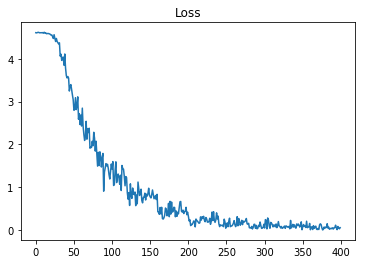

In [79]:
plt.figure()
plt.plot(model_l6_b.all_losses)
plt.title("Loss")

Text(0.5,1,'Accuracy')

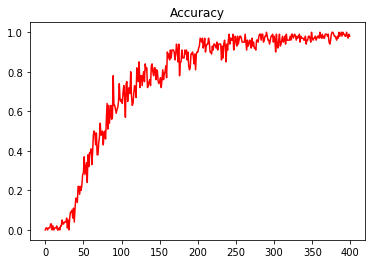

In [81]:
plt.figure()
plt.plot(model_l6_b.all_accuracy, 'r')
plt.title("Accuracy")

In [83]:
start_time = time.time()
train = Training(dataloaders, model_l7_b,0.01)
train.start()
print("--- %s seconds ---" % (time.time() - start_time))

/usr/local/miniconda3/envs/dl/lib/python3.5/site-packages/ipykernel_launcher.py:16: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  app.launch_new_instance()


Train Epoch: 0 [0/40000 (0.000%)]	Loss: 4.608090	Accuracy: 0.010
Train Epoch: 0 [1000/40000 (2.500%)]	Loss: 4.605978	Accuracy: 0.030
Train Epoch: 0 [2000/40000 (5.000%)]	Loss: 4.606459	Accuracy: 0.000
Train Epoch: 0 [3000/40000 (7.500%)]	Loss: 4.605820	Accuracy: 0.010
Train Epoch: 0 [4000/40000 (10.000%)]	Loss: 4.604454	Accuracy: 0.000
Train Epoch: 0 [5000/40000 (12.500%)]	Loss: 4.606170	Accuracy: 0.010
Train Epoch: 0 [6000/40000 (15.000%)]	Loss: 4.605041	Accuracy: 0.010
Train Epoch: 0 [7000/40000 (17.500%)]	Loss: 4.604658	Accuracy: 0.000
Train Epoch: 0 [8000/40000 (20.000%)]	Loss: 4.607106	Accuracy: 0.010
Train Epoch: 0 [9000/40000 (22.500%)]	Loss: 4.605210	Accuracy: 0.010
Train Epoch: 0 [10000/40000 (25.000%)]	Loss: 4.602833	Accuracy: 0.000
Train Epoch: 0 [11000/40000 (27.500%)]	Loss: 4.607271	Accuracy: 0.000
Train Epoch: 0 [12000/40000 (30.000%)]	Loss: 4.603661	Accuracy: 0.010
Train Epoch: 0 [13000/40000 (32.500%)]	Loss: 4.609399	Accuracy: 0.010
Train Epoch: 0 [14000/40000 (35.000%)

Train Epoch: 2 [38000/40000 (95.000%)]	Loss: 0.998825	Accuracy: 0.770
Train Epoch: 2 [39000/40000 (97.500%)]	Loss: 1.298002	Accuracy: 0.670
Train Epoch: 3 [0/40000 (0.000%)]	Loss: 0.873357	Accuracy: 0.820
Train Epoch: 3 [1000/40000 (2.500%)]	Loss: 0.855643	Accuracy: 0.790
Train Epoch: 3 [2000/40000 (5.000%)]	Loss: 0.812855	Accuracy: 0.770
Train Epoch: 3 [3000/40000 (7.500%)]	Loss: 0.858422	Accuracy: 0.750
Train Epoch: 3 [4000/40000 (10.000%)]	Loss: 0.885929	Accuracy: 0.730
Train Epoch: 3 [5000/40000 (12.500%)]	Loss: 0.858583	Accuracy: 0.760
Train Epoch: 3 [6000/40000 (15.000%)]	Loss: 1.096636	Accuracy: 0.730
Train Epoch: 3 [7000/40000 (17.500%)]	Loss: 0.604013	Accuracy: 0.790
Train Epoch: 3 [8000/40000 (20.000%)]	Loss: 1.075513	Accuracy: 0.740
Train Epoch: 3 [9000/40000 (22.500%)]	Loss: 0.801086	Accuracy: 0.770
Train Epoch: 3 [10000/40000 (25.000%)]	Loss: 0.940437	Accuracy: 0.770
Train Epoch: 3 [11000/40000 (27.500%)]	Loss: 0.742909	Accuracy: 0.790
Train Epoch: 3 [12000/40000 (30.000%)

Train Epoch: 5 [36000/40000 (90.000%)]	Loss: 0.333331	Accuracy: 0.930
Train Epoch: 5 [37000/40000 (92.500%)]	Loss: 0.236783	Accuracy: 0.920
Train Epoch: 5 [38000/40000 (95.000%)]	Loss: 0.390510	Accuracy: 0.890
Train Epoch: 5 [39000/40000 (97.500%)]	Loss: 0.315929	Accuracy: 0.920
Train Epoch: 6 [0/40000 (0.000%)]	Loss: 0.202607	Accuracy: 0.950
Train Epoch: 6 [1000/40000 (2.500%)]	Loss: 0.091830	Accuracy: 0.950
Train Epoch: 6 [2000/40000 (5.000%)]	Loss: 0.085897	Accuracy: 0.980
Train Epoch: 6 [3000/40000 (7.500%)]	Loss: 0.098483	Accuracy: 0.960
Train Epoch: 6 [4000/40000 (10.000%)]	Loss: 0.144979	Accuracy: 0.970
Train Epoch: 6 [5000/40000 (12.500%)]	Loss: 0.092787	Accuracy: 0.980
Train Epoch: 6 [6000/40000 (15.000%)]	Loss: 0.134536	Accuracy: 0.960
Train Epoch: 6 [7000/40000 (17.500%)]	Loss: 0.171096	Accuracy: 0.960
Train Epoch: 6 [8000/40000 (20.000%)]	Loss: 0.159794	Accuracy: 0.950
Train Epoch: 6 [9000/40000 (22.500%)]	Loss: 0.116276	Accuracy: 0.970
Train Epoch: 6 [10000/40000 (25.000%)

Text(0.5,1,'Loss')

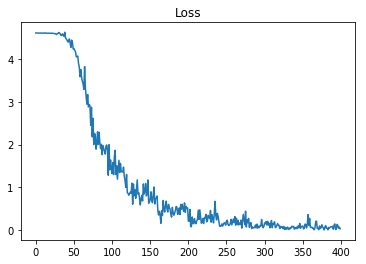

In [84]:
plt.figure()
plt.plot(model_l7_b.all_losses)
plt.title("Loss")

Text(0.5,1,'Accuracy')

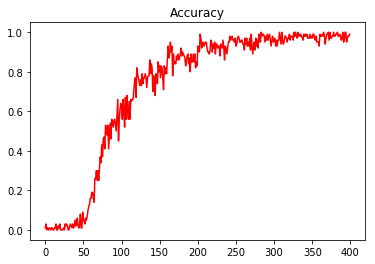

In [85]:
plt.figure()
plt.plot(model_l7_b.all_accuracy, 'r')
plt.title("Accuracy")

In [86]:
start_time = time.time()
train = Training(dataloaders, model_l8_b,0.01)
train.start()
print("--- %s seconds ---" % (time.time() - start_time))

/usr/local/miniconda3/envs/dl/lib/python3.5/site-packages/ipykernel_launcher.py:16: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  app.launch_new_instance()


Train Epoch: 0 [0/40000 (0.000%)]	Loss: 4.606719	Accuracy: 0.010
Train Epoch: 0 [1000/40000 (2.500%)]	Loss: 4.607838	Accuracy: 0.000
Train Epoch: 0 [2000/40000 (5.000%)]	Loss: 4.605924	Accuracy: 0.010
Train Epoch: 0 [3000/40000 (7.500%)]	Loss: 4.606379	Accuracy: 0.000
Train Epoch: 0 [4000/40000 (10.000%)]	Loss: 4.604686	Accuracy: 0.010
Train Epoch: 0 [5000/40000 (12.500%)]	Loss: 4.607509	Accuracy: 0.000
Train Epoch: 0 [6000/40000 (15.000%)]	Loss: 4.604425	Accuracy: 0.000
Train Epoch: 0 [7000/40000 (17.500%)]	Loss: 4.605340	Accuracy: 0.010
Train Epoch: 0 [8000/40000 (20.000%)]	Loss: 4.605596	Accuracy: 0.010
Train Epoch: 0 [9000/40000 (22.500%)]	Loss: 4.604040	Accuracy: 0.000
Train Epoch: 0 [10000/40000 (25.000%)]	Loss: 4.606996	Accuracy: 0.020
Train Epoch: 0 [11000/40000 (27.500%)]	Loss: 4.610078	Accuracy: 0.000
Train Epoch: 0 [12000/40000 (30.000%)]	Loss: 4.604823	Accuracy: 0.010
Train Epoch: 0 [13000/40000 (32.500%)]	Loss: 4.606499	Accuracy: 0.010
Train Epoch: 0 [14000/40000 (35.000%)

Train Epoch: 2 [38000/40000 (95.000%)]	Loss: 3.604127	Accuracy: 0.150
Train Epoch: 2 [39000/40000 (97.500%)]	Loss: 3.810459	Accuracy: 0.100
Train Epoch: 3 [0/40000 (0.000%)]	Loss: 3.520695	Accuracy: 0.170
Train Epoch: 3 [1000/40000 (2.500%)]	Loss: 3.411899	Accuracy: 0.200
Train Epoch: 3 [2000/40000 (5.000%)]	Loss: 3.687166	Accuracy: 0.100
Train Epoch: 3 [3000/40000 (7.500%)]	Loss: 3.709624	Accuracy: 0.130
Train Epoch: 3 [4000/40000 (10.000%)]	Loss: 3.126456	Accuracy: 0.220
Train Epoch: 3 [5000/40000 (12.500%)]	Loss: 3.725849	Accuracy: 0.140
Train Epoch: 3 [6000/40000 (15.000%)]	Loss: 3.248808	Accuracy: 0.240
Train Epoch: 3 [7000/40000 (17.500%)]	Loss: 3.626425	Accuracy: 0.140
Train Epoch: 3 [8000/40000 (20.000%)]	Loss: 3.092971	Accuracy: 0.260
Train Epoch: 3 [9000/40000 (22.500%)]	Loss: 3.117641	Accuracy: 0.250
Train Epoch: 3 [10000/40000 (25.000%)]	Loss: 3.466306	Accuracy: 0.220
Train Epoch: 3 [11000/40000 (27.500%)]	Loss: 3.091429	Accuracy: 0.270
Train Epoch: 3 [12000/40000 (30.000%)

Train Epoch: 5 [36000/40000 (90.000%)]	Loss: 0.761772	Accuracy: 0.780
Train Epoch: 5 [37000/40000 (92.500%)]	Loss: 0.690055	Accuracy: 0.810
Train Epoch: 5 [38000/40000 (95.000%)]	Loss: 0.901741	Accuracy: 0.760
Train Epoch: 5 [39000/40000 (97.500%)]	Loss: 0.679626	Accuracy: 0.820
Train Epoch: 6 [0/40000 (0.000%)]	Loss: 0.322071	Accuracy: 0.910
Train Epoch: 6 [1000/40000 (2.500%)]	Loss: 0.453282	Accuracy: 0.860
Train Epoch: 6 [2000/40000 (5.000%)]	Loss: 0.514557	Accuracy: 0.890
Train Epoch: 6 [3000/40000 (7.500%)]	Loss: 0.546563	Accuracy: 0.880
Train Epoch: 6 [4000/40000 (10.000%)]	Loss: 0.433188	Accuracy: 0.880
Train Epoch: 6 [5000/40000 (12.500%)]	Loss: 0.622536	Accuracy: 0.800
Train Epoch: 6 [6000/40000 (15.000%)]	Loss: 0.636387	Accuracy: 0.820
Train Epoch: 6 [7000/40000 (17.500%)]	Loss: 0.618078	Accuracy: 0.850
Train Epoch: 6 [8000/40000 (20.000%)]	Loss: 0.527986	Accuracy: 0.860
Train Epoch: 6 [9000/40000 (22.500%)]	Loss: 0.650084	Accuracy: 0.810
Train Epoch: 6 [10000/40000 (25.000%)

Train Epoch: 8 [34000/40000 (85.000%)]	Loss: 0.175623	Accuracy: 0.960
Train Epoch: 8 [35000/40000 (87.500%)]	Loss: 0.289479	Accuracy: 0.920
Train Epoch: 8 [36000/40000 (90.000%)]	Loss: 0.142090	Accuracy: 0.960
Train Epoch: 8 [37000/40000 (92.500%)]	Loss: 0.233148	Accuracy: 0.930
Train Epoch: 8 [38000/40000 (95.000%)]	Loss: 0.367744	Accuracy: 0.920
Train Epoch: 8 [39000/40000 (97.500%)]	Loss: 0.205181	Accuracy: 0.930
Train Epoch: 9 [0/40000 (0.000%)]	Loss: 0.102234	Accuracy: 0.980
Train Epoch: 9 [1000/40000 (2.500%)]	Loss: 0.133114	Accuracy: 0.960
Train Epoch: 9 [2000/40000 (5.000%)]	Loss: 0.140120	Accuracy: 0.950
Train Epoch: 9 [3000/40000 (7.500%)]	Loss: 0.084876	Accuracy: 0.980
Train Epoch: 9 [4000/40000 (10.000%)]	Loss: 0.109369	Accuracy: 0.950
Train Epoch: 9 [5000/40000 (12.500%)]	Loss: 0.144444	Accuracy: 0.930
Train Epoch: 9 [6000/40000 (15.000%)]	Loss: 0.091456	Accuracy: 0.970
Train Epoch: 9 [7000/40000 (17.500%)]	Loss: 0.206782	Accuracy: 0.960
Train Epoch: 9 [8000/40000 (20.000%

Text(0.5,1,'Loss')

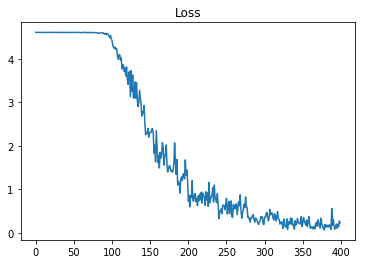

In [87]:
plt.figure()
plt.plot(model_l8_b.all_losses)
plt.title("Loss")

Text(0.5,1,'Accuracy')

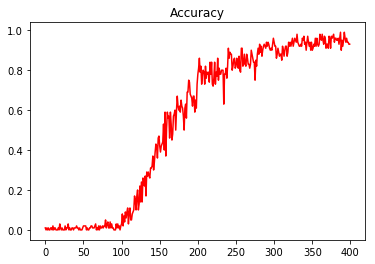

In [88]:
plt.figure()
plt.plot(model_l8_b.all_accuracy, 'r')
plt.title("Accuracy")

In [89]:
start_time = time.time()
train = Training(dataloaders, model_l6_fc_1_b, 0.01)
train.start()
print("--- %s seconds ---" % (time.time() - start_time))

/usr/local/miniconda3/envs/dl/lib/python3.5/site-packages/ipykernel_launcher.py:16: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  app.launch_new_instance()


Train Epoch: 0 [0/40000 (0.000%)]	Loss: 4.612371	Accuracy: 0.000
Train Epoch: 0 [1000/40000 (2.500%)]	Loss: 4.610752	Accuracy: 0.000
Train Epoch: 0 [2000/40000 (5.000%)]	Loss: 4.600473	Accuracy: 0.010
Train Epoch: 0 [3000/40000 (7.500%)]	Loss: 4.607250	Accuracy: 0.000
Train Epoch: 0 [4000/40000 (10.000%)]	Loss: 4.612160	Accuracy: 0.010
Train Epoch: 0 [5000/40000 (12.500%)]	Loss: 4.597711	Accuracy: 0.000
Train Epoch: 0 [6000/40000 (15.000%)]	Loss: 4.597670	Accuracy: 0.030
Train Epoch: 0 [7000/40000 (17.500%)]	Loss: 4.606896	Accuracy: 0.000
Train Epoch: 0 [8000/40000 (20.000%)]	Loss: 4.598133	Accuracy: 0.010
Train Epoch: 0 [9000/40000 (22.500%)]	Loss: 4.597225	Accuracy: 0.010
Train Epoch: 0 [10000/40000 (25.000%)]	Loss: 4.605535	Accuracy: 0.000
Train Epoch: 0 [11000/40000 (27.500%)]	Loss: 4.595763	Accuracy: 0.020
Train Epoch: 0 [12000/40000 (30.000%)]	Loss: 4.571815	Accuracy: 0.040
Train Epoch: 0 [13000/40000 (32.500%)]	Loss: 4.576440	Accuracy: 0.020
Train Epoch: 0 [14000/40000 (35.000%)

Train Epoch: 2 [38000/40000 (95.000%)]	Loss: 1.003608	Accuracy: 0.730
Train Epoch: 2 [39000/40000 (97.500%)]	Loss: 1.103310	Accuracy: 0.750
Train Epoch: 3 [0/40000 (0.000%)]	Loss: 0.478793	Accuracy: 0.890
Train Epoch: 3 [1000/40000 (2.500%)]	Loss: 0.335841	Accuracy: 0.910
Train Epoch: 3 [2000/40000 (5.000%)]	Loss: 0.473595	Accuracy: 0.880
Train Epoch: 3 [3000/40000 (7.500%)]	Loss: 0.503447	Accuracy: 0.860
Train Epoch: 3 [4000/40000 (10.000%)]	Loss: 0.581245	Accuracy: 0.850
Train Epoch: 3 [5000/40000 (12.500%)]	Loss: 0.394289	Accuracy: 0.860
Train Epoch: 3 [6000/40000 (15.000%)]	Loss: 0.458387	Accuracy: 0.890
Train Epoch: 3 [7000/40000 (17.500%)]	Loss: 0.339919	Accuracy: 0.900
Train Epoch: 3 [8000/40000 (20.000%)]	Loss: 0.455724	Accuracy: 0.890
Train Epoch: 3 [9000/40000 (22.500%)]	Loss: 0.431503	Accuracy: 0.850
Train Epoch: 3 [10000/40000 (25.000%)]	Loss: 0.445615	Accuracy: 0.890
Train Epoch: 3 [11000/40000 (27.500%)]	Loss: 0.466873	Accuracy: 0.900
Train Epoch: 3 [12000/40000 (30.000%)

Train Epoch: 5 [36000/40000 (90.000%)]	Loss: 0.116904	Accuracy: 0.950
Train Epoch: 5 [37000/40000 (92.500%)]	Loss: 0.301365	Accuracy: 0.920
Train Epoch: 5 [38000/40000 (95.000%)]	Loss: 0.160026	Accuracy: 0.940
Train Epoch: 5 [39000/40000 (97.500%)]	Loss: 0.095809	Accuracy: 0.970
Train Epoch: 6 [0/40000 (0.000%)]	Loss: 0.083446	Accuracy: 0.980
Train Epoch: 6 [1000/40000 (2.500%)]	Loss: 0.076961	Accuracy: 0.980
Train Epoch: 6 [2000/40000 (5.000%)]	Loss: 0.124919	Accuracy: 0.950
Train Epoch: 6 [3000/40000 (7.500%)]	Loss: 0.166710	Accuracy: 0.930
Train Epoch: 6 [4000/40000 (10.000%)]	Loss: 0.079737	Accuracy: 0.970
Train Epoch: 6 [5000/40000 (12.500%)]	Loss: 0.154524	Accuracy: 0.960
Train Epoch: 6 [6000/40000 (15.000%)]	Loss: 0.102652	Accuracy: 0.970
Train Epoch: 6 [7000/40000 (17.500%)]	Loss: 0.049497	Accuracy: 0.980
Train Epoch: 6 [8000/40000 (20.000%)]	Loss: 0.109005	Accuracy: 0.970
Train Epoch: 6 [9000/40000 (22.500%)]	Loss: 0.065826	Accuracy: 0.980
Train Epoch: 6 [10000/40000 (25.000%)

Train Epoch: 8 [34000/40000 (85.000%)]	Loss: 0.090623	Accuracy: 0.970
Train Epoch: 8 [35000/40000 (87.500%)]	Loss: 0.012164	Accuracy: 1.000
Train Epoch: 8 [36000/40000 (90.000%)]	Loss: 0.039318	Accuracy: 0.990
Train Epoch: 8 [37000/40000 (92.500%)]	Loss: 0.072143	Accuracy: 0.980
Train Epoch: 8 [38000/40000 (95.000%)]	Loss: 0.038833	Accuracy: 0.980
Train Epoch: 8 [39000/40000 (97.500%)]	Loss: 0.092700	Accuracy: 0.960
Train Epoch: 9 [0/40000 (0.000%)]	Loss: 0.003428	Accuracy: 1.000
Train Epoch: 9 [1000/40000 (2.500%)]	Loss: 0.330651	Accuracy: 0.950
Train Epoch: 9 [2000/40000 (5.000%)]	Loss: 0.003624	Accuracy: 1.000
Train Epoch: 9 [3000/40000 (7.500%)]	Loss: 0.015638	Accuracy: 1.000
Train Epoch: 9 [4000/40000 (10.000%)]	Loss: 0.041184	Accuracy: 0.980
Train Epoch: 9 [5000/40000 (12.500%)]	Loss: 0.012433	Accuracy: 0.990
Train Epoch: 9 [6000/40000 (15.000%)]	Loss: 0.041835	Accuracy: 0.990
Train Epoch: 9 [7000/40000 (17.500%)]	Loss: 0.030581	Accuracy: 0.990
Train Epoch: 9 [8000/40000 (20.000%

Text(0.5,1,'Loss')

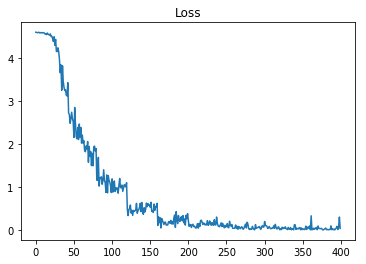

In [90]:
plt.figure()
plt.plot(model_l6_fc_1_b.all_losses)
plt.title("Loss")

Text(0.5,1,'Accuracy')

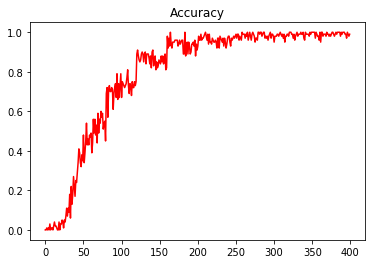

In [91]:
plt.figure()
plt.plot(model_l6_fc_1_b.all_accuracy, 'r')
plt.title("Accuracy")

In [92]:
start_time = time.time()
train = Training(dataloaders, model_l6_fc_2_b, 0.01)
train.start()
print("--- %s seconds ---" % (time.time() - start_time))

/usr/local/miniconda3/envs/dl/lib/python3.5/site-packages/ipykernel_launcher.py:16: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  app.launch_new_instance()


Train Epoch: 0 [0/40000 (0.000%)]	Loss: 4.603861	Accuracy: 0.010
Train Epoch: 0 [1000/40000 (2.500%)]	Loss: 4.599338	Accuracy: 0.020
Train Epoch: 0 [2000/40000 (5.000%)]	Loss: 4.607983	Accuracy: 0.020
Train Epoch: 0 [3000/40000 (7.500%)]	Loss: 4.602911	Accuracy: 0.030
Train Epoch: 0 [4000/40000 (10.000%)]	Loss: 4.604300	Accuracy: 0.000
Train Epoch: 0 [5000/40000 (12.500%)]	Loss: 4.600961	Accuracy: 0.020
Train Epoch: 0 [6000/40000 (15.000%)]	Loss: 4.611467	Accuracy: 0.010
Train Epoch: 0 [7000/40000 (17.500%)]	Loss: 4.606128	Accuracy: 0.050
Train Epoch: 0 [8000/40000 (20.000%)]	Loss: 4.596281	Accuracy: 0.010
Train Epoch: 0 [9000/40000 (22.500%)]	Loss: 4.609079	Accuracy: 0.020
Train Epoch: 0 [10000/40000 (25.000%)]	Loss: 4.601803	Accuracy: 0.010
Train Epoch: 0 [11000/40000 (27.500%)]	Loss: 4.601233	Accuracy: 0.000
Train Epoch: 0 [12000/40000 (30.000%)]	Loss: 4.595404	Accuracy: 0.000
Train Epoch: 0 [13000/40000 (32.500%)]	Loss: 4.593409	Accuracy: 0.030
Train Epoch: 0 [14000/40000 (35.000%)

Train Epoch: 2 [38000/40000 (95.000%)]	Loss: 0.871001	Accuracy: 0.780
Train Epoch: 2 [39000/40000 (97.500%)]	Loss: 1.196116	Accuracy: 0.710
Train Epoch: 3 [0/40000 (0.000%)]	Loss: 0.863848	Accuracy: 0.760
Train Epoch: 3 [1000/40000 (2.500%)]	Loss: 0.699335	Accuracy: 0.840
Train Epoch: 3 [2000/40000 (5.000%)]	Loss: 0.739909	Accuracy: 0.790
Train Epoch: 3 [3000/40000 (7.500%)]	Loss: 0.809297	Accuracy: 0.800
Train Epoch: 3 [4000/40000 (10.000%)]	Loss: 0.799205	Accuracy: 0.790
Train Epoch: 3 [5000/40000 (12.500%)]	Loss: 0.639867	Accuracy: 0.840
Train Epoch: 3 [6000/40000 (15.000%)]	Loss: 0.443304	Accuracy: 0.890
Train Epoch: 3 [7000/40000 (17.500%)]	Loss: 0.664556	Accuracy: 0.840
Train Epoch: 3 [8000/40000 (20.000%)]	Loss: 0.548290	Accuracy: 0.860
Train Epoch: 3 [9000/40000 (22.500%)]	Loss: 0.729731	Accuracy: 0.820
Train Epoch: 3 [10000/40000 (25.000%)]	Loss: 0.588688	Accuracy: 0.820
Train Epoch: 3 [11000/40000 (27.500%)]	Loss: 0.759717	Accuracy: 0.800
Train Epoch: 3 [12000/40000 (30.000%)

Train Epoch: 5 [36000/40000 (90.000%)]	Loss: 0.118457	Accuracy: 0.980
Train Epoch: 5 [37000/40000 (92.500%)]	Loss: 0.364758	Accuracy: 0.900
Train Epoch: 5 [38000/40000 (95.000%)]	Loss: 0.228920	Accuracy: 0.910
Train Epoch: 5 [39000/40000 (97.500%)]	Loss: 0.237158	Accuracy: 0.910
Train Epoch: 6 [0/40000 (0.000%)]	Loss: 0.082690	Accuracy: 0.990
Train Epoch: 6 [1000/40000 (2.500%)]	Loss: 0.149436	Accuracy: 0.960
Train Epoch: 6 [2000/40000 (5.000%)]	Loss: 0.090729	Accuracy: 0.970
Train Epoch: 6 [3000/40000 (7.500%)]	Loss: 0.075255	Accuracy: 0.980
Train Epoch: 6 [4000/40000 (10.000%)]	Loss: 0.165576	Accuracy: 0.930
Train Epoch: 6 [5000/40000 (12.500%)]	Loss: 0.097474	Accuracy: 0.970
Train Epoch: 6 [6000/40000 (15.000%)]	Loss: 0.095791	Accuracy: 0.960
Train Epoch: 6 [7000/40000 (17.500%)]	Loss: 0.303137	Accuracy: 0.940
Train Epoch: 6 [8000/40000 (20.000%)]	Loss: 0.114643	Accuracy: 0.960
Train Epoch: 6 [9000/40000 (22.500%)]	Loss: 0.053271	Accuracy: 0.980
Train Epoch: 6 [10000/40000 (25.000%)

Train Epoch: 8 [34000/40000 (85.000%)]	Loss: 0.025475	Accuracy: 1.000
Train Epoch: 8 [35000/40000 (87.500%)]	Loss: 0.066306	Accuracy: 0.970
Train Epoch: 8 [36000/40000 (90.000%)]	Loss: 0.069354	Accuracy: 0.970
Train Epoch: 8 [37000/40000 (92.500%)]	Loss: 0.058480	Accuracy: 0.970
Train Epoch: 8 [38000/40000 (95.000%)]	Loss: 0.047174	Accuracy: 0.980
Train Epoch: 8 [39000/40000 (97.500%)]	Loss: 0.082900	Accuracy: 0.970
Train Epoch: 9 [0/40000 (0.000%)]	Loss: 0.051112	Accuracy: 0.980
Train Epoch: 9 [1000/40000 (2.500%)]	Loss: 0.013024	Accuracy: 1.000
Train Epoch: 9 [2000/40000 (5.000%)]	Loss: 0.069737	Accuracy: 0.960
Train Epoch: 9 [3000/40000 (7.500%)]	Loss: 0.025223	Accuracy: 0.990
Train Epoch: 9 [4000/40000 (10.000%)]	Loss: 0.040696	Accuracy: 0.970
Train Epoch: 9 [5000/40000 (12.500%)]	Loss: 0.072381	Accuracy: 0.990
Train Epoch: 9 [6000/40000 (15.000%)]	Loss: 0.013064	Accuracy: 1.000
Train Epoch: 9 [7000/40000 (17.500%)]	Loss: 0.022710	Accuracy: 0.990
Train Epoch: 9 [8000/40000 (20.000%

Text(0.5,1,'Loss')

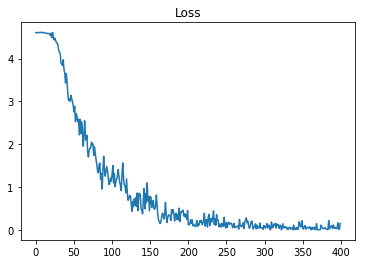

In [93]:
plt.figure()
plt.plot(model_l6_fc_2_b.all_losses)
plt.title("Loss")

Text(0.5,1,'Accuracy')

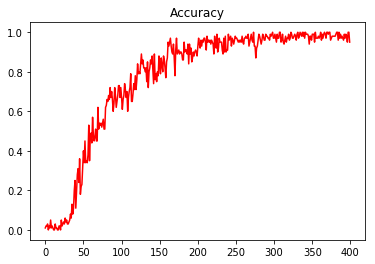

In [94]:
plt.figure()
plt.plot(model_l6_fc_2_b.all_accuracy, 'r')
plt.title("Accuracy")

In [95]:
start_time = time.time()
train = Training(dataloaders, model_l6_fc_3_b, 0.01)
train.start()
print("--- %s seconds ---" % (time.time() - start_time))

/usr/local/miniconda3/envs/dl/lib/python3.5/site-packages/ipykernel_launcher.py:16: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  app.launch_new_instance()


Train Epoch: 0 [0/40000 (0.000%)]	Loss: 4.606895	Accuracy: 0.000
Train Epoch: 0 [1000/40000 (2.500%)]	Loss: 4.608979	Accuracy: 0.010
Train Epoch: 0 [2000/40000 (5.000%)]	Loss: 4.606612	Accuracy: 0.020
Train Epoch: 0 [3000/40000 (7.500%)]	Loss: 4.601694	Accuracy: 0.020
Train Epoch: 0 [4000/40000 (10.000%)]	Loss: 4.600976	Accuracy: 0.010
Train Epoch: 0 [5000/40000 (12.500%)]	Loss: 4.600134	Accuracy: 0.010
Train Epoch: 0 [6000/40000 (15.000%)]	Loss: 4.603187	Accuracy: 0.010
Train Epoch: 0 [7000/40000 (17.500%)]	Loss: 4.594341	Accuracy: 0.040
Train Epoch: 0 [8000/40000 (20.000%)]	Loss: 4.599654	Accuracy: 0.030
Train Epoch: 0 [9000/40000 (22.500%)]	Loss: 4.600577	Accuracy: 0.000
Train Epoch: 0 [10000/40000 (25.000%)]	Loss: 4.605949	Accuracy: 0.000
Train Epoch: 0 [11000/40000 (27.500%)]	Loss: 4.601491	Accuracy: 0.000
Train Epoch: 0 [12000/40000 (30.000%)]	Loss: 4.600416	Accuracy: 0.010
Train Epoch: 0 [13000/40000 (32.500%)]	Loss: 4.612823	Accuracy: 0.000
Train Epoch: 0 [14000/40000 (35.000%)

Train Epoch: 2 [38000/40000 (95.000%)]	Loss: 1.179629	Accuracy: 0.740
Train Epoch: 2 [39000/40000 (97.500%)]	Loss: 1.619129	Accuracy: 0.650
Train Epoch: 3 [0/40000 (0.000%)]	Loss: 1.036878	Accuracy: 0.720
Train Epoch: 3 [1000/40000 (2.500%)]	Loss: 1.143702	Accuracy: 0.720
Train Epoch: 3 [2000/40000 (5.000%)]	Loss: 0.989004	Accuracy: 0.760
Train Epoch: 3 [3000/40000 (7.500%)]	Loss: 1.196297	Accuracy: 0.720
Train Epoch: 3 [4000/40000 (10.000%)]	Loss: 1.113588	Accuracy: 0.700
Train Epoch: 3 [5000/40000 (12.500%)]	Loss: 1.244419	Accuracy: 0.720
Train Epoch: 3 [6000/40000 (15.000%)]	Loss: 0.897518	Accuracy: 0.740
Train Epoch: 3 [7000/40000 (17.500%)]	Loss: 1.119718	Accuracy: 0.720
Train Epoch: 3 [8000/40000 (20.000%)]	Loss: 0.871437	Accuracy: 0.780
Train Epoch: 3 [9000/40000 (22.500%)]	Loss: 1.235230	Accuracy: 0.660
Train Epoch: 3 [10000/40000 (25.000%)]	Loss: 0.971250	Accuracy: 0.720
Train Epoch: 3 [11000/40000 (27.500%)]	Loss: 1.030601	Accuracy: 0.710
Train Epoch: 3 [12000/40000 (30.000%)

Train Epoch: 5 [36000/40000 (90.000%)]	Loss: 0.155581	Accuracy: 0.950
Train Epoch: 5 [37000/40000 (92.500%)]	Loss: 0.280115	Accuracy: 0.940
Train Epoch: 5 [38000/40000 (95.000%)]	Loss: 0.557678	Accuracy: 0.850
Train Epoch: 5 [39000/40000 (97.500%)]	Loss: 0.279456	Accuracy: 0.890
Train Epoch: 6 [0/40000 (0.000%)]	Loss: 0.100880	Accuracy: 0.970
Train Epoch: 6 [1000/40000 (2.500%)]	Loss: 0.092779	Accuracy: 0.990
Train Epoch: 6 [2000/40000 (5.000%)]	Loss: 0.071855	Accuracy: 0.980
Train Epoch: 6 [3000/40000 (7.500%)]	Loss: 0.171738	Accuracy: 0.940
Train Epoch: 6 [4000/40000 (10.000%)]	Loss: 0.100555	Accuracy: 0.970
Train Epoch: 6 [5000/40000 (12.500%)]	Loss: 0.115099	Accuracy: 0.960
Train Epoch: 6 [6000/40000 (15.000%)]	Loss: 0.182084	Accuracy: 0.950
Train Epoch: 6 [7000/40000 (17.500%)]	Loss: 0.141921	Accuracy: 0.960
Train Epoch: 6 [8000/40000 (20.000%)]	Loss: 0.105131	Accuracy: 0.970
Train Epoch: 6 [9000/40000 (22.500%)]	Loss: 0.204280	Accuracy: 0.940
Train Epoch: 6 [10000/40000 (25.000%)

Train Epoch: 8 [34000/40000 (85.000%)]	Loss: 0.132671	Accuracy: 0.960
Train Epoch: 8 [35000/40000 (87.500%)]	Loss: 0.040727	Accuracy: 0.990
Train Epoch: 8 [36000/40000 (90.000%)]	Loss: 0.075833	Accuracy: 0.980
Train Epoch: 8 [37000/40000 (92.500%)]	Loss: 0.055841	Accuracy: 0.980
Train Epoch: 8 [38000/40000 (95.000%)]	Loss: 0.105060	Accuracy: 0.980
Train Epoch: 8 [39000/40000 (97.500%)]	Loss: 0.063592	Accuracy: 0.980
Train Epoch: 9 [0/40000 (0.000%)]	Loss: 0.023164	Accuracy: 0.990
Train Epoch: 9 [1000/40000 (2.500%)]	Loss: 0.098143	Accuracy: 0.990
Train Epoch: 9 [2000/40000 (5.000%)]	Loss: 0.053920	Accuracy: 0.970
Train Epoch: 9 [3000/40000 (7.500%)]	Loss: 0.041280	Accuracy: 0.990
Train Epoch: 9 [4000/40000 (10.000%)]	Loss: 0.167247	Accuracy: 0.960
Train Epoch: 9 [5000/40000 (12.500%)]	Loss: 0.137023	Accuracy: 0.970
Train Epoch: 9 [6000/40000 (15.000%)]	Loss: 0.041914	Accuracy: 0.990
Train Epoch: 9 [7000/40000 (17.500%)]	Loss: 0.023583	Accuracy: 0.990
Train Epoch: 9 [8000/40000 (20.000%

Text(0.5,1,'Loss')

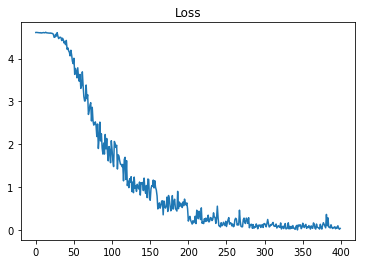

In [96]:
plt.figure()
plt.plot(model_l6_fc_3_b.all_losses)
plt.title("Loss")

Text(0.5,1,'Accuracy')

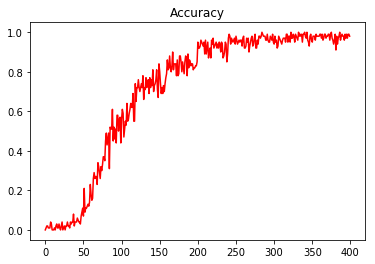

In [97]:
plt.figure()
plt.plot(model_l6_fc_3_b.all_accuracy, 'r')
plt.title("Accuracy")

In [82]:
count = 0
for batch_idx, (data,target) in enumerate(dataloaders['train']):
    data, target = Variable(data.cuda()), Variable(target.cuda())
    y_pred = model_l6_fc_1(data)#model
    prediction = torch.max(F.softmax(y_pred), 1)[1]
    pred_y = prediction.cpu().data.numpy().squeeze()
    target_y = target.cpu().data.numpy()
    count += sum(pred_y == target_y)
print('accuracy of ConvNet: {}%'.format(100*float(count)/float(batch_size*len(dataloaders['train']))),count)

/usr/local/miniconda3/envs/dl/lib/python3.5/site-packages/ipykernel_launcher.py:5: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  """


accuracy of ConvNet: 99.9725% 39989


In [98]:
count = 0
for batch_idx, (data,target) in enumerate(dataloaders['train']):
    data, target = Variable(data.cuda()), Variable(target.cuda())
    y_pred = model_l6_fc_2(data)#model
    prediction = torch.max(F.softmax(y_pred), 1)[1]
    pred_y = prediction.cpu().data.numpy().squeeze()
    target_y = target.cpu().data.numpy()
    count += sum(pred_y == target_y)
print('accuracy of ConvNet: {}%'.format(100*float(count)/float(batch_size*len(dataloaders['train']))),count)

/usr/local/miniconda3/envs/dl/lib/python3.5/site-packages/ipykernel_launcher.py:5: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  """


accuracy of ConvNet: 99.9725% 39989


In [99]:
count = 0
for batch_idx, (data,target) in enumerate(dataloaders['train']):
    data, target = Variable(data.cuda()), Variable(target.cuda())
    y_pred = model_l6_fc_3(data)#model
    prediction = torch.max(F.softmax(y_pred), 1)[1]
    pred_y = prediction.cpu().data.numpy().squeeze()
    target_y = target.cpu().data.numpy()
    count += sum(pred_y == target_y)
print('accuracy of ConvNet: {}%'.format(100*float(count)/float(batch_size*len(dataloaders['train']))),count)

/usr/local/miniconda3/envs/dl/lib/python3.5/site-packages/ipykernel_launcher.py:5: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  """


accuracy of ConvNet: 99.9725% 39989


In [100]:
count = 0
for batch_idx, (data,target) in enumerate(dataloaders['train']):
    data, target = Variable(data.cuda()), Variable(target.cuda())
    y_pred = model_l6(data)#model
    prediction = torch.max(F.softmax(y_pred), 1)[1]
    pred_y = prediction.cpu().data.numpy().squeeze()
    target_y = target.cpu().data.numpy()
    count += sum(pred_y == target_y)
print('accuracy of ConvNet: {}%'.format(100*float(count)/float(batch_size*len(dataloaders['train']))),count)

/usr/local/miniconda3/envs/dl/lib/python3.5/site-packages/ipykernel_launcher.py:5: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  """


accuracy of ConvNet: 99.9725% 39989


In [101]:
count = 0
for batch_idx, (data,target) in enumerate(dataloaders['train']):
    data, target = Variable(data.cuda()), Variable(target.cuda())
    y_pred = model_l7(data)#model
    prediction = torch.max(F.softmax(y_pred), 1)[1]
    pred_y = prediction.cpu().data.numpy().squeeze()
    target_y = target.cpu().data.numpy()
    count += sum(pred_y == target_y)
print('accuracy of ConvNet: {}%'.format(100*float(count)/float(batch_size*len(dataloaders['train']))),count)

/usr/local/miniconda3/envs/dl/lib/python3.5/site-packages/ipykernel_launcher.py:5: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  """


accuracy of ConvNet: 99.9725% 39989


In [102]:
count = 0
for batch_idx, (data,target) in enumerate(dataloaders['train']):
    data, target = Variable(data.cuda()), Variable(target.cuda())
    y_pred = model_l8(data)#model
    prediction = torch.max(F.softmax(y_pred), 1)[1]
    pred_y = prediction.cpu().data.numpy().squeeze()
    target_y = target.cpu().data.numpy()
    count += sum(pred_y == target_y)
print('accuracy of ConvNet: {}%'.format(100*float(count)/float(batch_size*len(dataloaders['train']))),count)

/usr/local/miniconda3/envs/dl/lib/python3.5/site-packages/ipykernel_launcher.py:5: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  """


accuracy of ConvNet: 99.9725% 39989


In [103]:
count = 0
for batch_idx, (data,target) in enumerate(dataloaders['train']):
    data, target = Variable(data.cuda()), Variable(target.cuda())
    y_pred = model_l6_fc_1_b(data)#model
    prediction = torch.max(F.softmax(y_pred), 1)[1]
    pred_y = prediction.cpu().data.numpy().squeeze()
    target_y = target.cpu().data.numpy()
    count += sum(pred_y == target_y)
print('accuracy of ConvNet: {}%'.format(100*float(count)/float(batch_size*len(dataloaders['train']))),count)

/usr/local/miniconda3/envs/dl/lib/python3.5/site-packages/ipykernel_launcher.py:5: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  """


accuracy of ConvNet: 98.985% 39594


accuracy of rests should be the same, no need to run. will use model_l6_fc_1 in the next step

In [ ]:
count = 0
for batch_idx, (data,target) in enumerate(dataloaders['train']):
    data, target = Variable(data.cuda()), Variable(target.cuda())
    y_pred = model_l6_fc_2_b(data)#model
    prediction = torch.max(F.softmax(y_pred), 1)[1]
    pred_y = prediction.cpu().data.numpy().squeeze()
    target_y = target.cpu().data.numpy()
    count += sum(pred_y == target_y)
print('accuracy of ConvNet: {}%'.format(100*float(count)/float(batch_size*len(dataloaders['train']))),count)

In [ ]:
count = 0
for batch_idx, (data,target) in enumerate(dataloaders['train']):
    data, target = Variable(data.cuda()), Variable(target.cuda())
    y_pred = model_l6_fc_3_b(data)#model
    prediction = torch.max(F.softmax(y_pred), 1)[1]
    pred_y = prediction.cpu().data.numpy().squeeze()
    target_y = target.cpu().data.numpy()
    count += sum(pred_y == target_y)
print('accuracy of ConvNet: {}%'.format(100*float(count)/float(batch_size*len(dataloaders['train']))),count)

In [ ]:
count = 0
for batch_idx, (data,target) in enumerate(dataloaders['train']):
    data, target = Variable(data.cuda()), Variable(target.cuda())
    y_pred = model_l6_b(data)#model
    prediction = torch.max(F.softmax(y_pred), 1)[1]
    pred_y = prediction.cpu().data.numpy().squeeze()
    target_y = target.cpu().data.numpy()
    count += sum(pred_y == target_y)
print('accuracy of ConvNet: {}%'.format(100*float(count)/float(batch_size*len(dataloaders['train']))),count)

In [ ]:
count = 0
for batch_idx, (data,target) in enumerate(dataloaders['train']):
    data, target = Variable(data.cuda()), Variable(target.cuda())
    y_pred = model_l7_b(data)#model
    prediction = torch.max(F.softmax(y_pred), 1)[1]
    pred_y = prediction.cpu().data.numpy().squeeze()
    target_y = target.cpu().data.numpy()
    count += sum(pred_y == target_y)
print('accuracy of ConvNet: {}%'.format(100*float(count)/float(batch_size*len(dataloaders['train']))),count)

In [ ]:
count = 0
for batch_idx, (data,target) in enumerate(dataloaders['train']):
    data, target = Variable(data.cuda()), Variable(target.cuda())
    y_pred = model_l8_b(data)#model
    prediction = torch.max(F.softmax(y_pred), 1)[1]
    pred_y = prediction.cpu().data.numpy().squeeze()
    target_y = target.cpu().data.numpy()
    count += sum(pred_y == target_y)
print('accuracy of ConvNet: {}%'.format(100*float(count)/float(batch_size*len(dataloaders['train']))),count)